Population is getting older, the average population age is increasing while new birth are decreasing in the last decade.

Data preparation and Visualization : (Graded out of 100)
1.      You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]
2.      You must also rationalise justify and detail all the methods used to prepare the data for ML. [0-30]
3.      Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. [0-20]
4.      All design and implementation of your visualizations must be justified and detailed in full., making reference to Tufts Principles [0-30]

Machine learning for Data Analytics:(Graded out of 100)
1.	Explain which project management framework  (CRISP-DM, KDD or SEMMA) is required for a data science project. Discuss and justify with real-life scenarios. Provide an explanation of why you chose a supervised, unsupervised, or semi-supervised machine learning technique for the dataset you used for ML modeling. [0 - 20]
2.	Machine learning models have a wide range of uses, including prediction, classification, and clustering. It is advised that you assess several approaches (at least two), choose appropriate hyperparameters for the optimal outcomes of Machine Learning models using an approach of hyperparameter tunning, such as GridSearchCV or RandomizedSearchCV. [0 - 30]
3.	Show the results of two or more ML modeling comparisons in a table or graph format. Review and critically examine the machine learning models' performance based on the selected metric for supervised, unsupervised, and semi-supervised approaches. [0 - 30]
4.	Demonstrate the similarities and differences between your Machine Learning modelling results using the tables or visualizations. Provide a report along with an explanation and interpretation of the relevance and effectiveness of your findings. [0 - 20]


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import binom
import sklearn.preprocessing as preproc

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Statistics

#### 1. Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

The first thing we want to do is to load our dataset:

In [46]:
# import the csv file into the dataframe df
df = pd.read_csv("../Data/Population_estimates_from_1926.csv")

# display the first 5 rows of df
df.head()

STATISTIC Label  Year Single Year of Age         Sex  \
0  Population estimates from 1926  1926           All ages  Both sexes   
1  Population estimates from 1926  1926           All ages        Male   
2  Population estimates from 1926  1926           All ages      Female   
3  Population estimates from 1926  1926       Under 1 year  Both sexes   
4  Population estimates from 1926  1926       Under 1 year        Male   

     UNIT    VALUE  
0  Number  2971992  
1  Number  1506889  
2  Number  1465103  
3  Number    55391  
4  Number    28084

The head function gave us an idea of what the dataset looks like, let's check its dimension:

In [47]:
# dysplay the shape of our dataset
df.shape

(11817, 6)

Let's now see the type of each column, the presence of null values and unique values for each column:

In [48]:
# display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.0+ KB


Another important thing we want to look at is the presence of null values:

In [49]:
# display sum of null values for each column
df.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

Looking at the dataset we see that some of the rows and columns might be unwanted, we then plot unique values for each column:

In [50]:
for i in df.columns:
    print(i + ": ")
    print(df[i].unique())
    print("\n")

STATISTIC Label: 
['Population estimates from 1926']


Year: 
[1926 1936 1946 1951 1961 1966 1971 1979 1981 1986 1991 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


Single Year of Age: 
['All ages' 'Under 1 year' '1 year' '2 years' '3 years' '4 years'
 '5 years' '6 years' '7 years' '8 years' '9 years' '10 years' '11 years'
 '12 years' '13 years' '14 years' '15 years' '16 years' '17 years'
 '18 years' '19 years' '20 years' '21 years' '22 years' '23 years'
 '24 years' '25 years' '26 years' '27 years' '28 years' '29 years'
 '30 years' '31 years' '32 years' '33 years' '34 years' '35 years'
 '36 years' '37 years' '38 years' '39 years' '40 years' '41 years'
 '42 years' '43 years' '44 years' '45 years' '46 years' '47 years'
 '48 years' '49 years' '50 years' '51 years' '52 years' '53 years'
 '54 years' '55 years' '56 years' '57 years' '58 years' '59 years'
 '60 years' '61 years' '62 years' '63 yea

So far we can say that our dataset contains population data in Ireland (people living in Ireland) from 1923 to 2023. We also get information of population age and sex.

Let's see the data distribution when using the describe function

In [51]:
# display data distribution
df.describe()

Year         VALUE
count  11817.000000  1.181700e+04
mean    1996.410256  5.352461e+04
std       24.463165  2.867754e+05
min     1926.000000  6.000000e+00
25%     1986.000000  1.242700e+04
50%     2004.000000  2.667500e+04
75%     2014.000000  3.557700e+04
max     2023.000000  5.281612e+06

The data we see from the describe function is missleading for multiple reasons:
- the VALUE column represents the population number but the describe function doesn't take into account that we have duplicate values in our datasets (due to data being split on male, female and both sexes)
- descriptive data of the year column doesn't gives us much information, descriptive data for sex and/or age would be more helpful

Before diving into a more detailed descriptive analysis of our dataset, we need to do some transformation to our dataset.
Let's start by demonstrating that the population count of both sexes is equal to the population count of each sex

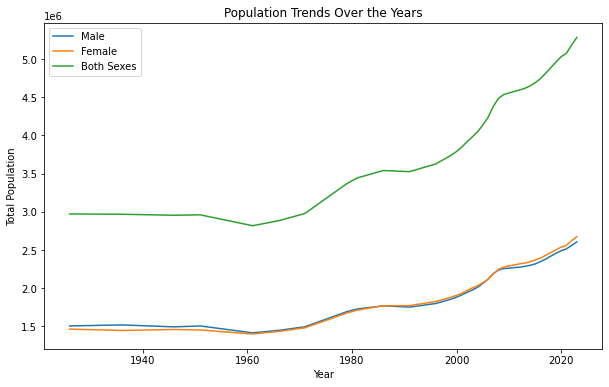

In [52]:
# Filter the DataFrame for rows where Sex is male, female, or both sexes
male_df = df[(df['Sex'] == 'Male') & (df['Single Year of Age'] == 'All ages')]
female_df = df[(df['Sex'] == 'Female') & (df['Single Year of Age'] == 'All ages')]
both_sexes_df = df[(df['Sex'] == 'Both sexes') & (df['Single Year of Age'] == 'All ages')]

# Group by Year and calculate the sum of VALUE for males, females, and both sexes for each year
male_df_grouped = male_df.groupby('Year')['VALUE'].sum()
female_df_grouped = female_df.groupby('Year')['VALUE'].sum()
both_sexes_df_grouped = both_sexes_df.groupby('Year')['VALUE'].sum()

# Total Population by Year and Sex
plt.figure(figsize=(10, 6))
sns.lineplot(data=male_df_grouped, label="Male")
sns.lineplot(data=female_df_grouped, label="Female")
sns.lineplot(data=both_sexes_df_grouped, label="Both Sexes")
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends Over the Years')
plt.show()

Above graph shows how population changes over years but it is not the best visualization to demonstrate that in our dataset the sum of male and female population is the same to both sexes in each year. 

To do so a stacked bar chard is more suitable

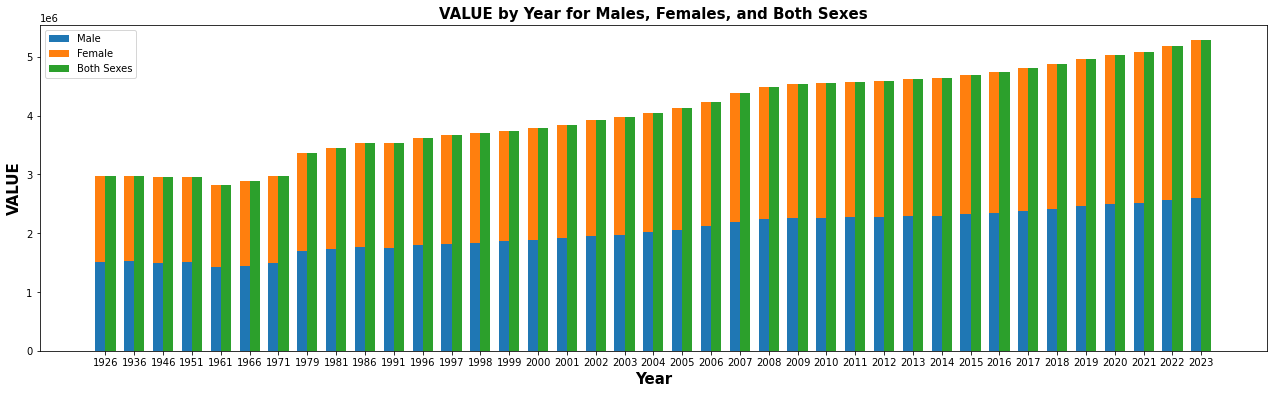

In [53]:
# Group by Year and calculate the sum of VALUE for males, females, and both sexes for each year
male_df_grouped = male_df_grouped.reset_index()
female_df_grouped = female_df_grouped.reset_index()
both_sexes_df_grouped = both_sexes_df_grouped.reset_index()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = male_df_grouped.index
r2 = [x for x in r1]
r3 = [x + bar_width for x in r1]

# Create a grouped bar plot with stacked bars for male and female
plt.figure(figsize=(22, 6))
plt.bar(r1, male_df_grouped['VALUE'], width=bar_width, label='Male')
plt.bar(r2, female_df_grouped['VALUE'], bottom=male_df_grouped['VALUE'], width=bar_width, label='Female')
plt.bar(r3, both_sexes_df_grouped['VALUE'], width=bar_width, label='Both Sexes')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(male_df_grouped))], male_df_grouped['Year'])

plt.ylabel('VALUE', fontweight='bold', fontsize=15)
plt.title('VALUE by Year for Males, Females, and Both Sexes', fontweight='bold', fontsize=15)

# Create legend & Show graphic
plt.legend()
plt.show()

At this point we can proceed with a descriptive analysis for either male, female or both sexes.

Let's see, for example, the average population for each of those categories over time:

In [54]:
# This information can help us understand the central tendency and distribution of the male population data.
male_df.describe()

Year         VALUE
count    39.000000  3.900000e+01
mean   1996.410256  2.018926e+06
std      24.781910  3.548980e+05
min    1926.000000  1.416549e+06
25%    1988.500000  1.761554e+06
50%    2004.000000  2.011914e+06
75%    2013.500000  2.292586e+06
max    2023.000000  2.606170e+06

In [55]:
# This information can help us understand the central tendency and distribution of the female population data.
female_df.describe()

Year         VALUE
count    39.000000  3.900000e+01
mean   1996.410256  2.035564e+06
std      24.781910  3.824662e+05
min    1926.000000  1.401792e+06
25%    1988.500000  1.771627e+06
50%    2004.000000  2.033274e+06
75%    2013.500000  2.337468e+06
max    2023.000000  2.675442e+06

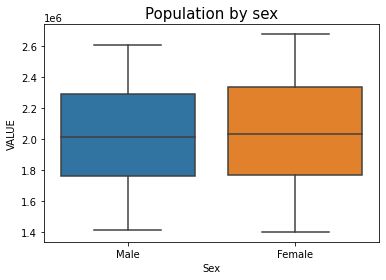

In [56]:
# The following code snippet creates a new DataFrame, 'male_female_df', by filtering data from the original DataFrame 'df'.
# It selects rows where 'Single Year of Age' is 'All ages' and 'Sex' is not 'Both sexes'. This filters the data for male and female populations.

# Importantly, this code prepares the data for visualizing population differences between males and females.

male_female_df = df[(df['Single Year of Age'] == 'All ages') & (df['Sex'] != 'Both sexes')]

# The code then uses Seaborn to create a boxplot to compare the population data between males and females.
# It plots the 'Sex' on the x-axis and the 'VALUE' (likely population count) on the y-axis.

sns.boxplot(x='Sex', y='VALUE', data=male_female_df)

# The next two lines set the title for the boxplot and display the plot.
plt.title('Population by sex', fontsize=15)
plt.show()

Previous boxplot actually shows population data by sex.
For instance we can say that:
- The minimum population recorded for males and females is about the same while the maximum recorded population for female is higher
- The average female population is higher than the male one

Those are interesting information to look at that couldn't be obtained with previously plotted graphs.

We now obtained multiple info on how female population differs from the male one. But what about how the age infuelces the population value? 

So far we filtered our datasets using the "All ages filter" on the "Single Year of Age" column but we are missing very useful data here. This is mainly because that column is showed as string and not int, let's map it and reduce the columns to the ones we really care.

With the new dataset it would be nice to now to get some descriptive data on the ages. Let's try to perform this analysis without considering the sex of the population

In [57]:
# This subset of data focuses on age-related population statistics for both sexes.
both_sexes_age_df = df[(df['Sex'] == 'Both sexes') & (df['Single Year of Age'] != 'All ages')]

# Next, a dictionary 'age_mapping' is created to map each unique age category to a numerical value.
age_mapping = {age: i for i, age in enumerate(both_sexes_age_df["Single Year of Age"].unique())}

# The code then adds a new column 'Age' to the 'both_sexes_age_df' DataFrame, which corresponds to the mapped numerical age values.
both_sexes_age_df['Age'] = both_sexes_age_df['Single Year of Age'].map(age_mapping)

# Subsequently, the DataFrame is restructured to include only relevant columns: 'Year', 'Single Year of Age', 'Age', 'Sex', and 'VALUE'.
both_sexes_age_df = both_sexes_age_df[["Year", "Single Year of Age", "Age", "Sex", "VALUE"]]

# Finally, the 'describe()' method is used to generate summary statistics for the 'both_sexes_age_df' DataFrame.
both_sexes_age_df.describe()


Year          Age         VALUE
count  3900.000000  3900.000000   3900.000000
mean   1996.410256    49.500000  40544.895641
std      24.465267    28.869772  23783.909198
min    1926.000000     0.000000     65.000000
25%    1986.000000    24.750000  20827.500000
50%    2004.000000    49.500000  45819.500000
75%    2014.000000    74.250000  60653.750000
max    2023.000000    99.000000  87281.000000

The describe function doesn't provide us the relevant information we are looking for because we have a compressed dataset where, for each year and age, we represent the number of the population.

To have actual results from this function, we would need to explode the datasets and have "VALUE"x"Age" rows for each age in each year. This would take a long time, instead we apply some mathematical calculation.

First thing we do is to group population by age, so that we know the number of people with a specific age over time:

In [58]:
# In this code, the 'both_sexes_age_df' DataFrame is grouped by 'Age', and the sum of 'VALUE' is calculated for each age group.
both_sexes_age_df_grouped = both_sexes_age_df.groupby('Age')['VALUE'].sum()

# Initialize variables to calculate the weighted sum and the total population.
weighted_sum = 0
total_population = 0

# Loop through the age groups to calculate the weighted sum of age * population and the total population.
for i in range(len(both_sexes_age_df_grouped)):
    # Calculate the weighted sum by multiplying the age (i) by the population count for that age group and adding it to the total.
    weighted_sum += i * both_sexes_age_df_grouped[i]
    
    # Calculate the total population by summing the population counts for all age groups.
    total_population += both_sexes_age_df_grouped[i]

# Calculate the mean population age by dividing the weighted sum by the total population.
mean_age = weighted_sum / total_population

# Print the calculated mean population age with two decimal places.
print(f"Mean Population: {mean_age:.2f} years")

Mean Population: 34.95 years


An alternative way to compute the same average would have been:

In [35]:
# Calculate the weighted sum of age * population
weighted_sum = (both_sexes_age_df['Age'] * both_sexes_age_df['VALUE']).sum()

# Calculate the total population
total_population = both_sexes_age_df['VALUE'].sum()

# Calculate the mean population age
mean_age = weighted_sum / total_population

print(f"Mean Population: {mean_age:.2f} years")

Mean Population: 34.95 years


Let's try to perform the same analysis for years in the last decade (2013, 2018 and 2023):

In [41]:
def mean_age_by_year(year):
    # Calculate filtered df for given year
    both_sexes_age_year_df = both_sexes_age_df[both_sexes_age_df["Year"]==year]
    # Calculate the weighted sum of age * population
    weighted_sum_year = (both_sexes_age_year_df['Age'] * both_sexes_age_year_df['VALUE']).sum()
    # Calculate the total population
    total_population_year = both_sexes_age_year_df['VALUE'].sum()
    # Calculate the mean population age
    mean_age_year = weighted_sum_year / total_population_year
    
    return mean_age_year

for i in [2013, 2018, 2023]:
    print(f"Mean population age in {i} is {mean_age_by_year(i):.2f} years")

Mean population age in 2013 is 36.07 years
Mean population age in 2018 is 37.25 years
Mean population age in 2023 is 38.61 years


It's very interesting to see how the mean population age has been increasing in the last decade, meaning that our population is getting older.

We will use this information for further analysis.

Let's now also compute the median and the mode of the population age over time

In [59]:
# Calculate the cumulative distribution of population counts and add it as a new column 'Cumulative_Population' in the DataFrame.
both_sexes_age_df['Cumulative_Population'] = both_sexes_age_df['VALUE'].cumsum()

# Find the median age by calculating the age where the cumulative population reaches half of the total population.
median_population = both_sexes_age_df['VALUE'].sum() / 2
median_age = both_sexes_age_df[both_sexes_age_df['Cumulative_Population'] >= median_population]['Age'].iloc[0]

# Print the calculated median age.
print(f"Median population age is {median_age} years")

# Find the mode age by identifying the age with the highest population count.
mode_index = both_sexes_age_df['VALUE'].idxmax()
mode_age = both_sexes_age_df.loc[mode_index, "Age"]

# Print the calculated mode age.
print(f"Mode population age is {mode_age} years")

# Calculate the weighted mean by summing the products of age and population, divided by the total population.
weighted_mean = (both_sexes_age_df['Age'] * both_sexes_age_df['VALUE']).sum() / both_sexes_age_df['VALUE'].sum()

# Calculate the weighted standard deviation using the formula for a weighted standard deviation.
squared_deviations = ((both_sexes_age_df['Age'] - weighted_mean) ** 2) * both_sexes_age_df['VALUE']
weighted_std_dev = (squared_deviations.sum() / both_sexes_age_df['VALUE'].sum()) ** 0.5

# Print the calculated weighted standard deviation with two decimal places.
print(f"Weighted standard deviation: {weighted_std_dev:.2f} years")

Median population age is 30 years
Mode population age is 43 years
Weighted standard deviation: 22.41


Mean: The mean age is the average age of the population. It is calculated by adding up all the ages and dividing by the total number of people in the population. If the mean age is increasing over time, it may suggest that the population is aging, and the older generations are becoming a larger proportion of the population.

Median: The median age is the middle age in a population when ages are sorted from youngest to oldest. It divides the population into two equal halves. If the median age is increasing, it suggests that the population is aging, as the midpoint of ages is moving toward older individuals.

Mode: The mode is the age that appears most frequently in the population. When the mode age is increasing, it could indicate that there is a growing cohort of people at a specific age, which may be due to factors like increased birth rates during a certain period or immigration trends.

Weighted Standard Deviation: The weighted standard deviation is a measure of the spread or dispersion of ages in the population, with each age category weighted by its relative frequency in the population. A higher standard deviation indicates greater variability in ages, which may imply a more diverse age structure in the population.

Here's what these statistics can tell us:

If the mean and median age are increasing over time, it suggests that the population is aging, which can have various implications for healthcare, retirement, and labor force dynamics.

If there are multiple modes in the age distribution, it might indicate different generational or demographic shifts occurring within the population.

The weighted standard deviation can provide insights into the age distribution's spread. A higher standard deviation may suggest a broader range of ages in the population, while a lower standard deviation indicates a more concentrated age structure.

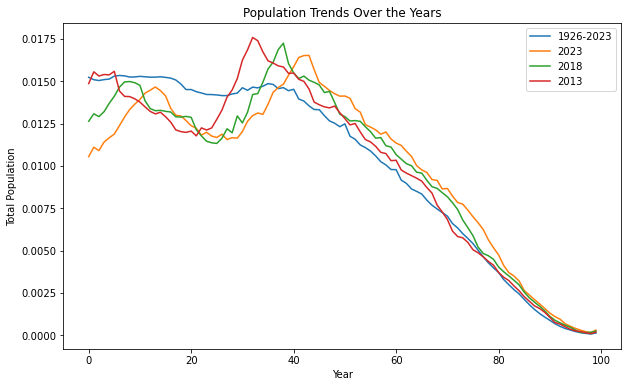

In [60]:
# Calculate the total population distribution for multiple years and normalizing it to obtain a relarive proportion.

total_population_df = both_sexes_age_df.groupby("Age")["VALUE"].sum()
total_population_df = total_population_df/total_population_df.sum()

total_population_2023_df = both_sexes_age_df[both_sexes_age_df["Year"]==2023].groupby("Age")["VALUE"].sum()
total_population_2023_df = total_population_2023_df/total_population_2023_df.sum()

total_population_2018_df = both_sexes_age_df[both_sexes_age_df["Year"]==2018].groupby("Age")["VALUE"].sum()
total_population_2018_df = total_population_2018_df/total_population_2018_df.sum()

total_population_2013_df = both_sexes_age_df[both_sexes_age_df["Year"]==2013].groupby("Age")["VALUE"].sum()
total_population_2013_df = total_population_2013_df/total_population_2013_df.sum()

# Create a line plot to visualize population trends over the years, including 1926-2023, 2023, 2018, and 2013.
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_population_df, label="1926-2023")
sns.lineplot(data=total_population_2023_df, label="2023")
sns.lineplot(data=total_population_2018_df, label="2018")
sns.lineplot(data=total_population_2013_df, label="2013")
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends Over the Years')
plt.legend()
plt.show()

Age is becoming more and more skewed, moving from left to right as age is increasing in the last years

### 2.      Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report. [0-30]

The Poisson distribution is often used to model count data, such as the number of events or occurrences within a fixed interval. As we have data on population growth, we can model it as a Poisson distribution. Each year represents a fixed interval, and the number of births can be counted as events within that interval.

The problem we want to solve is:
- In Ireland there are, in average, mean_births a year. If we watch Ireland any random year, what is the probability of having new births less than the average (mean_births)?

This is how the problem is configured:
- Numer of elements = number of births
- Specific place = in the world
- Time frame = per year

The idea is to first of all compute the mean_births (λ) of the new births population from 1923 to 2023. This will be used as the mean of our Poisson distribution.

Once we got the λ we configure the compute the following two problems:
- In Ireland there are, in average, λ a year. If we watch Ireland any random year from 1926 to 2023, what is the probability of having new births less than λ?
- In Ireland there are, in average, λ a year. If we watch Ireland any random year from last decade (2013 to 2023), what is the probability of having new births less than λ?

The idea is to demonstrata that this probability is much lower in the last decade with respect than to all years.

In [65]:
# Let's filter our dataset only for Age = 0
new_births_df = both_sexes_age_df[both_sexes_age_df["Age"]==0].groupby(["Year", "VALUE"]).sum().reset_index()

# Calculate the mean (λ) of the Poisson distribution from the data
λ = new_births_df['VALUE'].mean()

# Calculate the probability, in a year, to have less births that the average births
probability = poisson.cdf(k = λ, mu= λ)

print(f"The probability, in a random year, to have less that {λ:.0f} births is: {probability:.2f}")

The probability, in a random year, to have less that 61764 births is: 0.50


The previous result makes totally sense given that we were computing the probability on the average.
What we are interested to see is if the same probability still applies for the last decade.

What we want to see now is if the probability of having the same number of births is still the same for the last decade:

In [66]:
# Let's filter our dataset only for Age = 0 and last decade
new_births_last_decade_df = both_sexes_age_df[(both_sexes_age_df["Age"]==0) & (both_sexes_age_df["Year"]>=2013)].groupby(["Year", "VALUE"]).sum().reset_index()

# Calculate the mean (λ) for the last decade
λ_last_decade = new_births_last_decade_df['VALUE'].mean()

# Calculate the probability, in a year, to have less births that the average births
probability_last_decade = poisson.cdf(k = λ, mu= λ_last_decade)

print(f"The probability, in a random year from last decade, to have less that {λ:.0f} births is: {probability_last_decade:.2f}")

The probability, in a random year from last decade, to have less that 61764 births is: 0.95


This data is extremelly helpful to let us understand that one of the reasoning of aging is due to the fact that new births are decreasing:

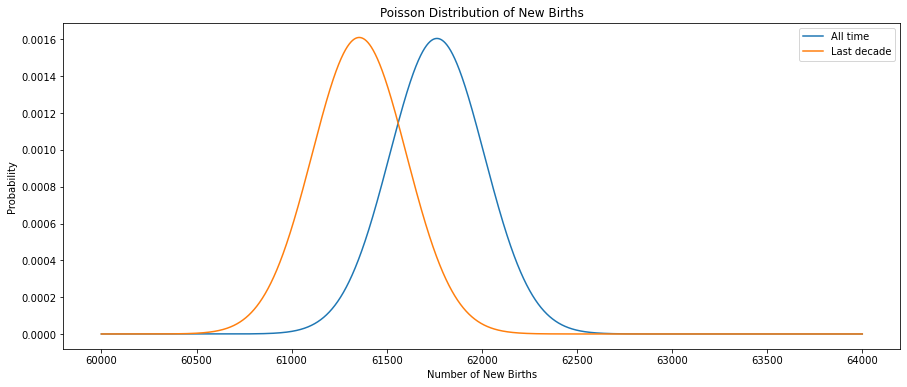

In [67]:
# Fit the Poisson distribution to the data
poisson_dist = poisson(mu=λ)
poisson_dist_last_decade = poisson(mu=λ_last_decade)

# Generate a range of values for the x-axis (number of births)
x = np.arange(60000, 64000)

# Calculate the probability mass function (PMF) for each value of x
pmf = poisson_dist.pmf(x)
pmf_last_decade = poisson_dist_last_decade.pmf(x)

# Plot the Poisson PMF
plt.figure(figsize=(15, 6))
plt.plot(x, pmf, label="All time")
plt.plot(x, pmf_last_decade, label="Last decade")
plt.xlabel('Number of New Births')
plt.ylabel('Probability')
plt.title('Poisson Distribution of New Births')
plt.legend()
plt.show()

### TO ADD: Law of Large Numbers

Still looking at newborn data, it would be interesting to see, for each year, if we randomly choose 500 people what is the probability to encounter at least 10 new born.

Let's first of all try to solve this problem for the year 2023.

It is know that, in 2023, about 1% of the population is newborn. If we randomly choose 500 people. What is the probability to have at least 10 newbors?

- number of people = number of elements
- newbord = characteristic or attribute
- within 500 people = limit

To compute the binomial distribution the first thing we need to calculate is p. p represents the new born population % in 2023:

In [74]:
# newborn
n = both_sexes_age_df[(both_sexes_age_df["Age"]==0) & (both_sexes_age_df["Year"]==2023)]["VALUE"].values[0]
# total population
t = both_sexes_age_df[both_sexes_age_df["Year"]==2023]["VALUE"].sum()
# percentage of newborn
p = n/t

We can now compute the distribution:

In [76]:
# P(X>10)
result_2023 = binom.sf(k=9, n=500, p=p)

print(f"The probability of finding at least 10 newbors out of 500 people in 2023 is {result_2023*100:.0f}%")

The probability of finding at least 10 newbors out of 500 people in 2023 is 4%


Let's now see what happens for other years

In [77]:
binomial_dict = {}

for i in both_sexes_age_df["Year"].unique():   
    # newborn
    n = both_sexes_age_df[(both_sexes_age_df["Age"]==0) & (both_sexes_age_df["Year"]==i)]["VALUE"].values[0]
    # total population
    t = both_sexes_age_df[both_sexes_age_df["Year"]==i]["VALUE"].sum()
    # percentage of newborn
    p = n/t
    # binomial result
    r = binom.sf(k=9, n=500, p=p)
    
    binomial_dict[i] = r

binomial_dict contains the probability, for each year available from 1926 to 2023, to obey to the rules of the stated problem.

Let's try to better visualize the results with a plot:

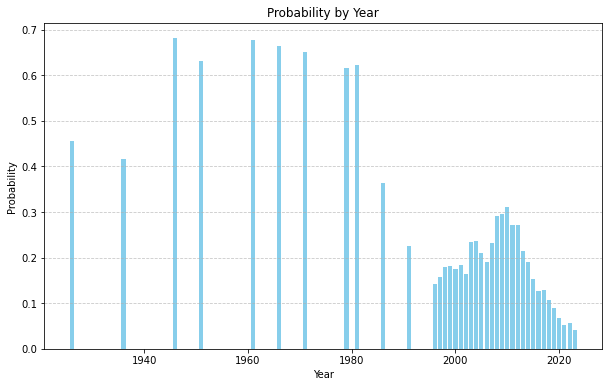

In [78]:
# Convert the dictionary to a DataFrame
df_prob = pd.DataFrame(binomial_dict.items(), columns=["Year", "Probability"])

# Plotting a bar chart for the "Probability" column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(df_prob["Year"], df_prob["Probability"], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Probability")
plt.title("Probability by Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.show()

It is clear from previous graph how this probability is decresing in the last few years.

Another very important information we didn't discuss so far is the data available, we start to have a yearly data only from 1996. This will be important during the cleaning process for ML.

### 3.       Use Normal distribution to explain or identify some information about your dataset. [0-20]

To use normal distribution we should first of all understand if we have some variable in our dataset that is normally distributed.

The variables we will be looking at are:
- Population over time
- Population average age over time
- Newborn population over time

To check if the data is normally distributed we will use two methods:
- Q-Q Plot
- Shapiro-Wilk Normality Test

A Q-Q plot compares the distribution of the data to a normal distribution by plotting the quantiles of the data against the quantiles of the normal distribution. If the data is normally distributed, the points on the plot will form a straight line.

The Shapiro-Wilk Normality Test measures the difference between the observed distribution and the expected normal distribution. This test produces a p-value that, if less than a significance level, rejects the null hypothesis and conclude that the data is not normally distributed. For our study, we configure the significance level at 0.05 (means we are willing to accept a 5% chance of rejecting the null hypothesis when it's true).

Population over time

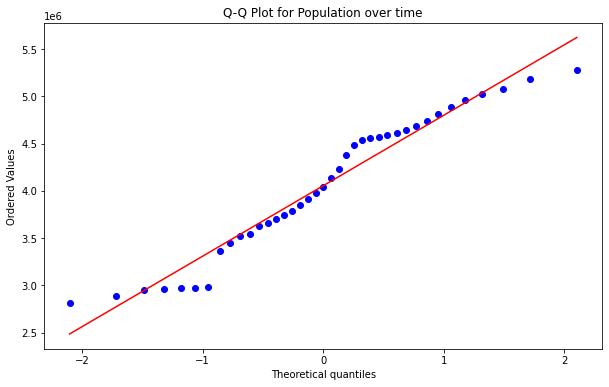

The Population over time data may follow a normal distribution (p-value: 0.0517).


In [79]:
# Select rows where "Single Year of Age" is "All ages" and "Sex" is "Both sexes," and extract "Year" and "VALUE" columns
poo = df[(df["Single Year of Age"] == "All ages") & (df["Sex"] == "Both sexes")].loc[:, ["Year", "VALUE"]]

# Extract the "VALUE" column
data = poo["VALUE"]

# Perform the Shapiro-Wilk Normality Test
shapiro_stat, shapiro_p = stats.shapiro(data)

# Visualize the data with a Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Population over time")
plt.show()

# Check the p-value from the Shapiro-Wilk test and determine normality
if shapiro_p > 0.05:
    print(f"The Population over time data may follow a normal distribution (p-value: {shapiro_p:.4f}).")
else:
    print(f"The Population over time data does not follow a normal distribution (p-value: {shapiro_p:.4f}).")

Given that the p-value is not less than 0.05 and that the Q-Q plot shows that the quantiles of the data are kind of forming a straight-line, we can conclude that the population over time is normally distributed. But what does it mean?

A normally distributed variable is one that frequently occurs within a small range of values, reducing the frequency at the tails due to outliers. 

The graph of a normally distributed variable is a a bell curve and whe can demonstrate this by computing mean and standard deviation:

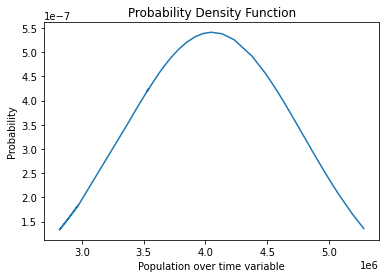

In [108]:
# Calculate the mean and standard deviation of the data
mean = statistics.mean(data)
sd = statistics.stdev(data)

# Plot the probability density function (PDF) of the data using the calculated mean and standard deviation
plt.plot(data, norm.pdf(data, mean, sd))

# Add labels to the plot
plt.title('Probability Density Function')
plt.xlabel('Population over time variable')
plt.ylabel('Probability')

# Display the plot
plt.show()

In [106]:
print(f"Mean: {mean:.0f}")
print(f"Std: {sd:.0f}")

Mean: 4054490
Std: 737169


If we want to explain what it means to have a normally distributed data for the population over time variable we can say:
- The simmetry suggests that fluctuations of population over time is balanced, meaning that if there is a year were the population is above average there is also one year where it is below
- There is no high dispersion as the standard deviation value is not big with respect to the mean. This means that there are no years with extremelly low or high population

Overall this analysis allows us to say that the population is growning naturally without any distruptive event creating crazy spikes or deeps of population. Still this analysis doesn't take into consideration the fact that the population is growing because of aging previously analysed.

Newborn population over time

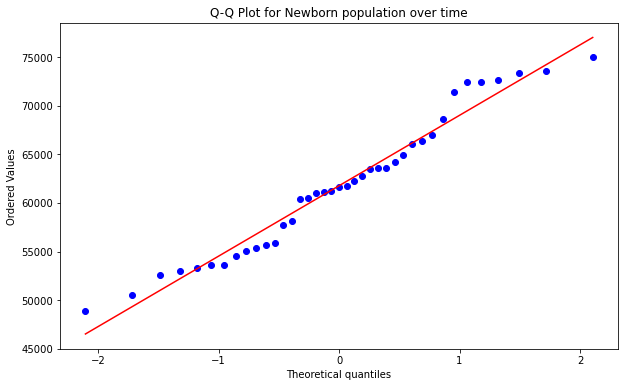

The Newborn population over time data may follow a normal distribution (p-value: 0.1679).


In [86]:
# Create a DataFrame from the 'new_births_year' dictionary
nbpot = pd.DataFrame(new_births_year, columns=["Year", "VALUE"])

# Extract the "VALUE" column
data = nbpot["VALUE"]

# Perform the Shapiro-Wilk Normality Test
shapiro_stat, shapiro_p = stats.shapiro(data)

# Visualize the data with a Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Newborn population over time")
plt.show()

# Check the p-value from the Shapiro-Wilk test and determine normality
if shapiro_p > 0.05:
    print(f"The Newborn population over time data may follow a normal distribution (p-value: {shapiro_p:.4f}).")
else:
    print(f"The Newborn population over time data does not follow a normal distribution (p-value: {shapiro_p:.4f}).")

### Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]

### You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]

Our interest is to work with the dataset to predict what will be the population in the following years for different ages.
For this reason we start by reducing the dataset to what we really care.

Reading dataset

In [43]:
df.head()

STATISTIC Label  Year Single Year of Age         Sex  \
0  Population estimates from 1926  1926           All ages  Both sexes   
1  Population estimates from 1926  1926           All ages        Male   
2  Population estimates from 1926  1926           All ages      Female   
3  Population estimates from 1926  1926       Under 1 year  Both sexes   
4  Population estimates from 1926  1926       Under 1 year        Male   

     UNIT    VALUE  
0  Number  2971992  
1  Number  1506889  
2  Number  1465103  
3  Number    55391  
4  Number    28084

In [44]:
df_new = df[(df["Single Year of Age"]!="All ages") & (df["Sex"]=="Both sexes")]

In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 3 to 11814
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     3900 non-null   object
 1   Year                3900 non-null   int64 
 2   Single Year of Age  3900 non-null   object
 3   Sex                 3900 non-null   object
 4   UNIT                3900 non-null   object
 5   VALUE               3900 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 213.3+ KB


In [46]:
df_new.describe()

Year         VALUE
count  3900.000000   3900.000000
mean   1996.410256  40544.895641
std      24.465267  23783.909198
min    1926.000000     65.000000
25%    1986.000000  20827.500000
50%    2004.000000  45819.500000
75%    2014.000000  60653.750000
max    2023.000000  87281.000000

In [47]:
df_new.shape

(3900, 6)

In [48]:
df_new.duplicated().sum()

0

In [49]:
df_new.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [50]:
for i in df_new.columns:
    print(f"Column {i} has following unique values:")
    print(df_new[i].unique())
    print("\n")

Column STATISTIC Label has following unique values:
['Population estimates from 1926']


Column Year has following unique values:
[1926 1936 1946 1951 1961 1966 1971 1979 1981 1986 1991 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


Column Single Year of Age has following unique values:
['Under 1 year' '1 year' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '10 years' '11 years' '12 years' '13 years'
 '14 years' '15 years' '16 years' '17 years' '18 years' '19 years'
 '20 years' '21 years' '22 years' '23 years' '24 years' '25 years'
 '26 years' '27 years' '28 years' '29 years' '30 years' '31 years'
 '32 years' '33 years' '34 years' '35 years' '36 years' '37 years'
 '38 years' '39 years' '40 years' '41 years' '42 years' '43 years'
 '44 years' '45 years' '46 years' '47 years' '48 years' '49 years'
 '50 years' '51 years' '52 years' '53 years' '54 years' '55 ye

In [51]:
df_new.dtypes

STATISTIC Label       object
Year                   int64
Single Year of Age    object
Sex                   object
UNIT                  object
VALUE                  int64
dtype: object

Data reduction

We see that few of the columns contain a single value and we do understand that this won't be beneficial for our analysis

In [52]:
df_new = df_new.loc[:, ["Year", "Single Year of Age", "VALUE"]]

In [53]:
df_new.head()

Year Single Year of Age  VALUE
3   1926       Under 1 year  55391
6   1926             1 year  55876
9   1926            2 years  58273
12  1926            3 years  59050
15  1926            4 years  59123

Feature Engineering

In [54]:
age_mapping = {age: i for i, age in enumerate(both_sexes_data["Single Year of Age"].unique())}

df_new['Age'] = df_new['Single Year of Age'].map(age_mapping)
df_new = df_new[["Year", "Single Year of Age", "Age", "VALUE"]]

df_new.describe()

Year          Age         VALUE
count  3900.000000  3900.000000   3900.000000
mean   1996.410256    49.500000  40544.895641
std      24.465267    28.869772  23783.909198
min    1926.000000     0.000000     65.000000
25%    1986.000000    24.750000  20827.500000
50%    2004.000000    49.500000  45819.500000
75%    2014.000000    74.250000  60653.750000
max    2023.000000    99.000000  87281.000000

In [55]:
df_new.head()

Year Single Year of Age  Age  VALUE
3   1926       Under 1 year    0  55391
6   1926             1 year    1  55876
9   1926            2 years    2  58273
12  1926            3 years    3  59050
15  1926            4 years    4  59123

In [56]:
df_new.groupby(["Age", "Year"])["VALUE"].sum()

Age  Year
0    1926    55391
     1936    53606
     1946    66081
     1951    63557
     1961    62772
             ...  
99   2019     1076
     2020     1050
     2021     1136
     2022     1185
     2023     1600
Name: VALUE, Length: 3900, dtype: int64

To possibly spot outliers I want to plot, for each age, the population value for different years  

In [57]:
import plotly.express as px

# Assuming you have a DataFrame simple_ages_df with columns 'Year', 'Age_Int', and 'VALUE'
# Group by 'Year' and 'Age_Int' and calculate the sum
df_new_grouped = df_new.groupby(["Age", "Year"])["VALUE"].sum().reset_index()

# Create an interactive bar chart
fig = px.bar(df_new_grouped, x='Year', y='VALUE', animation_frame='Age',
             title='Population Distribution by Age Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Population')

# Show the plot
fig.show()

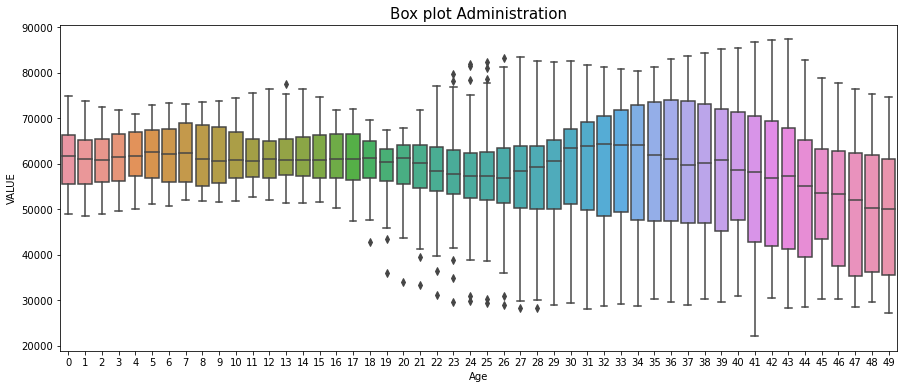

In [58]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y ='VALUE', data=df_new[df_new["Age"]<50])
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

Creating features

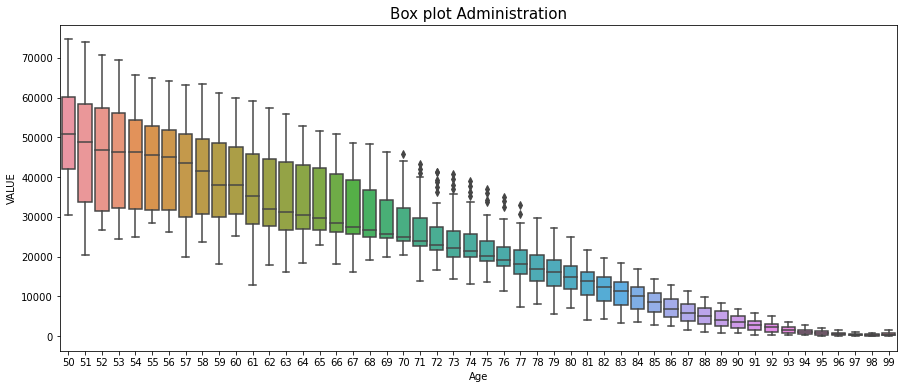

In [59]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y ='VALUE', data=df_new[(df_new["Age"]<100) & (df_new["Age"]>=50)])
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

Data cleaning/wrangling

In [60]:
for age in df_new["Age"]:
    
    # Filter the DataFrame for the specific age
    age_subset = df_new[df_new["Age"] == age]
    
    # Calculate Q1 and Q3 for the age subset
    Q1 = age_subset["VALUE"].quantile(0.25)
    Q3 = age_subset["VALUE"].quantile(0.75)
    
    # Calculate the IQR for the age subset
    IQR = Q3 - Q1
    
    # Identify outliers and set the "outlier" column for the age subset
    age_subset["outlier"] = np.where((age_subset["VALUE"] < (Q1 - 1.5 * IQR)) | (age_subset["VALUE"] > (Q3 + 1.5 * IQR)), "Yes", "No")
    #df_new["outlier"] = np.where((((df_new["VALUE"] < (Q1 - 1.5 * IQR)) | (df_new["VALUE"] > (Q3 + 1.5 * IQR)) & (df_new["Age"] == i))), "Yes", "No")
    
    # Update the original DataFrame with the results for the age subset
    df_new[df_new["Age"] == age]["outlier"] = age_subset["outlier"]

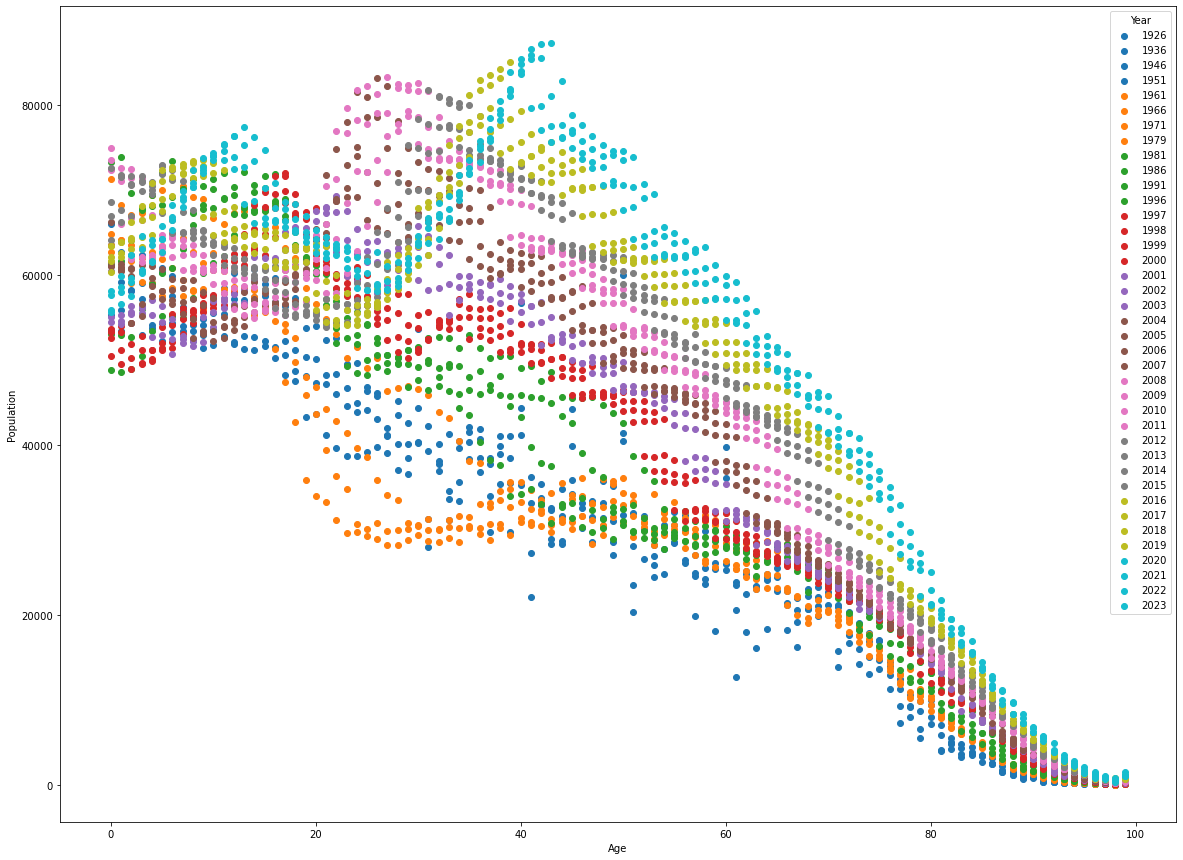

In [61]:
# Create a colormap based on unique years
colormap = plt.cm.get_cmap('tab10', len(df_new['Year'].unique()))

fig, ax = plt.subplots(figsize=(20, 15))

# Iterate through the data and use the colormap to set the color based on the "year" column
for i, year in enumerate(df_new['Year'].unique()):
    year_data = df_new[df_new['Year'] == year]
    ax.scatter(year_data["Age"], year_data["VALUE"], label=year, color=colormap(i))

ax.set_xlabel("Age")
ax.set_ylabel("Population")
ax.legend(title="Year")
plt.show()

# Filling missing data
# Data normalization

We saw that between 1926 and 1996 we are missing a lot of data, more precisely:

In [62]:
delta = 1996 - 1926 - len(df_new[(df_new["Year"]>=1926) & (df_new["Year"]<=1996)]["Year"].unique())

print(f"There are {delta} missing years between 1926 and 1996")

There are 58 missing years between 1926 and 1996


In [63]:
years_available = len(df_new["Year"].unique())

print(f"There are {years_available} years available in our dataset")

There are 39 years available in our dataset


Given that the number of missing data is greater that the number of total years available, it might be worth just tropping years before 1926. But let's create a second version of the dataset where this data is filled with Linear Interpolation.

Linear interpolation estimates missing values by drawing a straight line between the nearest available data points and filling in the missing values along that line. This is suitable when the population changes relatively smoothly over time.

In [64]:
all_years = [year for year in range(1926, 2023 + 1)]
years_to_remove = df_new[(df_new["Year"]>=1926) & (df_new["Year"]<=2023)]["Year"].unique()
filtered_years = [year for year in all_years if year not in years_to_remove]

In [65]:
import pandas as pd

# Create an empty list to store data
data = []

# Loop through each year and age, creating a row for each combination
for year in filtered_years:
    for age in range(100):
        data.append([year, age])

# Create the DataFrame
df_missing_years = pd.DataFrame(data, columns=['Year', 'Age'])

In [66]:
df_missing_years

Year  Age
0     1927    0
1     1927    1
2     1927    2
3     1927    3
4     1927    4
...    ...  ...
5895  1995   95
5896  1995   96
5897  1995   97
5898  1995   98
5899  1995   99

[5900 rows x 2 columns]

In [67]:
concat_df = pd.concat([df_new, df_missing_years]).sort_values(by=["Year", "Age"])

In [68]:
concat_df = concat_df.drop("Single Year of Age", axis=1)

In [69]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 3 to 11814
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    9800 non-null   int64  
 1   Age     9800 non-null   int64  
 2   VALUE   3900 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 306.2 KB


In [70]:
# First, convert the "Year" column to a datetime object for proper interpolation
concat_df['Year'] = pd.to_datetime(concat_df['Year'], format='%Y')

# Sort the DataFrame by "Year" and "Age" for proper interpolation
concat_df.sort_values(by=['Year', 'Age'], inplace=True)

# Use linear interpolation to fill missing values in the "VALUE" column
concat_df['VALUE'] = concat_df.groupby('Age')['VALUE'].transform(lambda x: x.interpolate())

# Reset the index if needed
concat_df.reset_index(drop=True, inplace=True)

In [71]:
concat_df[concat_df["Year"]=="1928-01-01"]

Year  Age    VALUE
200 1928-01-01    0  55034.0
201 1928-01-01    1  55399.8
202 1928-01-01    2  57497.2
203 1928-01-01    3  57843.0
204 1928-01-01    4  58049.6
..         ...  ...      ...
295 1928-01-01   95    230.0
296 1928-01-01   96    182.0
297 1928-01-01   97    106.6
298 1928-01-01   98    100.6
299 1928-01-01   99    161.2

[100 rows x 3 columns]

In [72]:
# Use the .dt.year attribute to extract the year and convert it to an integer
concat_df['Year'] = concat_df['Year'].dt.year

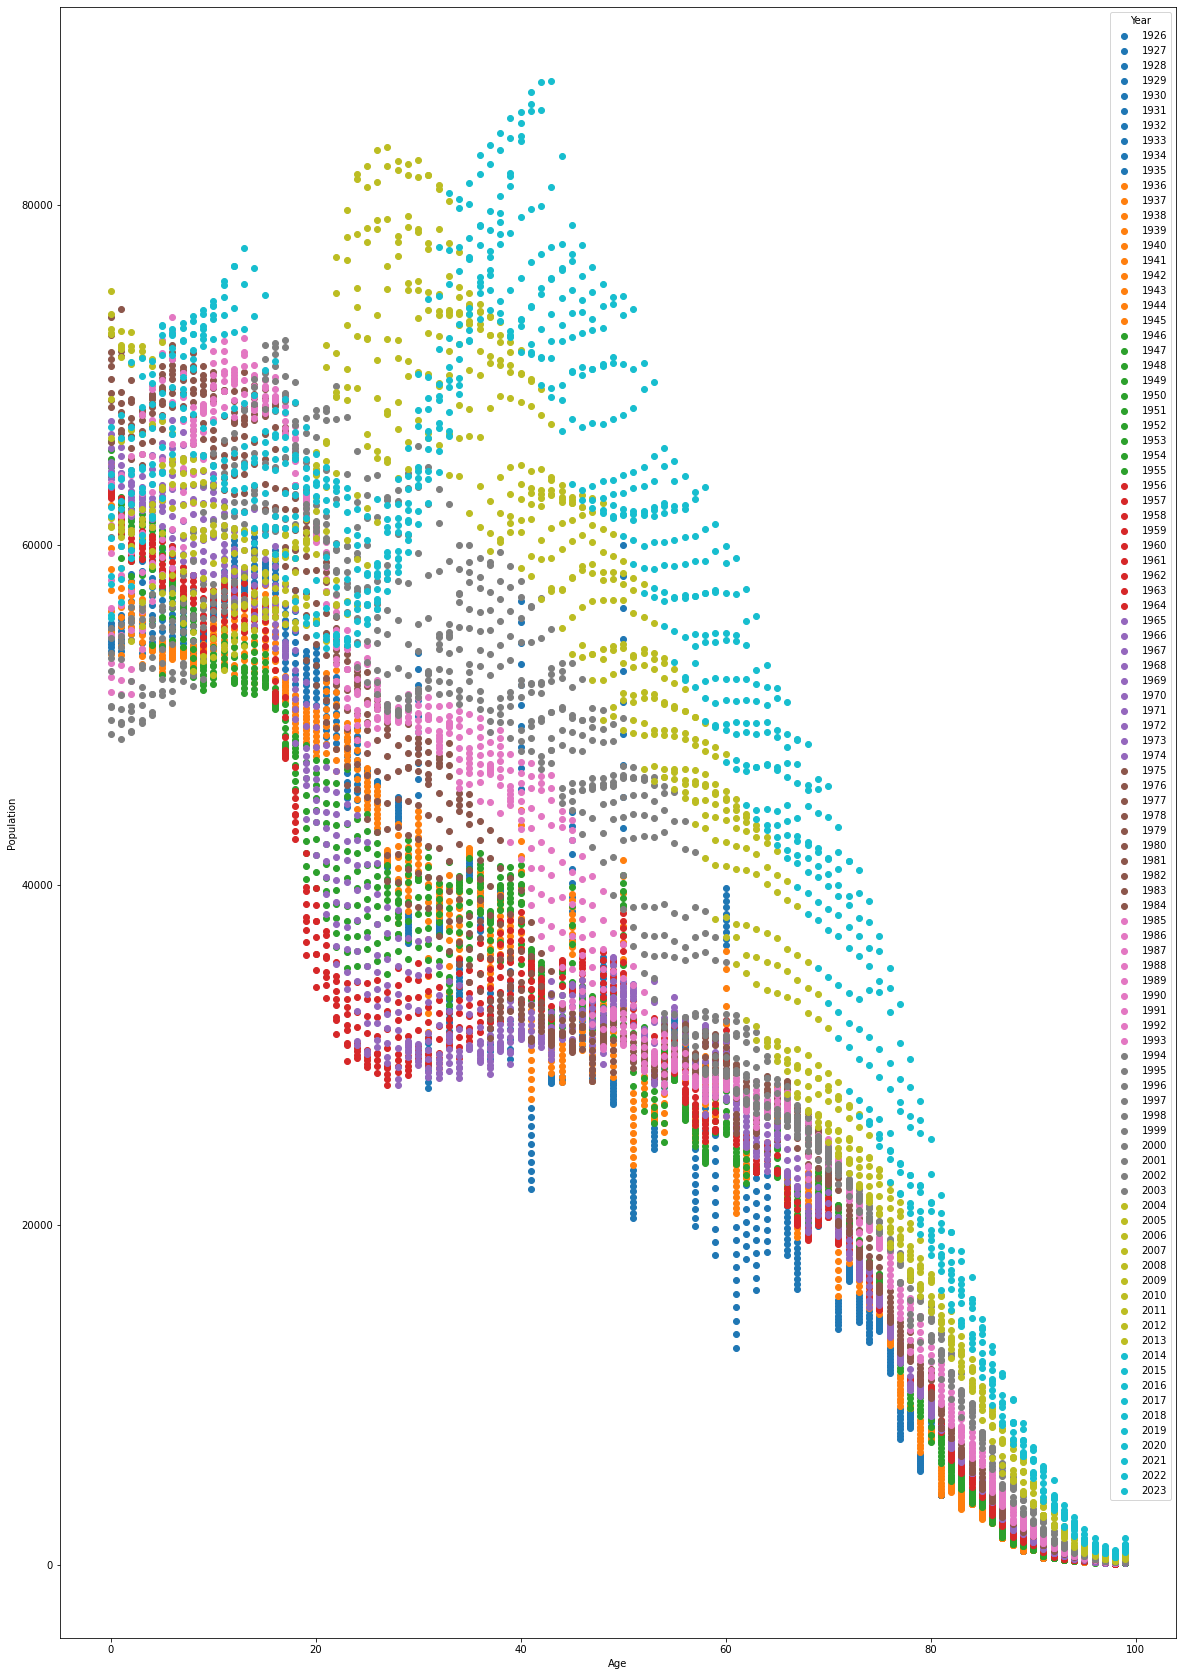

In [73]:
# Create a colormap based on unique years
colormap = plt.cm.get_cmap('tab10', len(concat_df['Year'].unique()))

fig, ax = plt.subplots(figsize=(20, 30))

# Iterate through the data and use the colormap to set the color based on the "year" column
for i, year in enumerate(concat_df['Year'].unique()):
    year_data = concat_df[concat_df['Year'] == year]
    ax.scatter(year_data["Age"], year_data["VALUE"], label=year, color=colormap(i))

ax.set_xlabel("Age")
ax.set_ylabel("Population")
ax.legend(title="Year")
plt.show()

In [74]:
# Assuming you have a DataFrame simple_ages_df with columns 'Year', 'Age_Int', and 'VALUE'
# Group by 'Year' and 'Age_Int' and calculate the sum
concat_df_grouped = concat_df.groupby(["Age", "Year"])["VALUE"].sum().reset_index()

# Create an interactive bar chart
fig = px.bar(concat_df_grouped, x='Year', y='VALUE', animation_frame='Age',
             title='Population Distribution by Age Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Population')

# Show the plot
fig.show()

As we still don't know if the model we will be using is sensitive to normalization or not, we create a second version of the dataset that is normalized

In [75]:
df_scaled = concat_df
df_scaled["minmax"]=preproc.minmax_scale(df_scaled[["VALUE"]])
df_scaled["standardized"]=preproc.StandardScaler().fit_transform(df_scaled[["VALUE"]])
df_scaled["l2_normalized"]= preproc.normalize(df_scaled[["VALUE"]], axis=0)

In [76]:
df_scaled

Year  Age    VALUE    minmax  standardized  l2_normalized
0     1926    0  55391.0  0.634356      0.939497       0.013610
1     1926    1  55876.0  0.639917      0.961567       0.013729
2     1926    2  58273.0  0.667400      1.070643       0.014318
3     1926    3  59050.0  0.676309      1.106000       0.014509
4     1926    4  59123.0  0.677146      1.109322       0.014527
...    ...  ...      ...       ...           ...            ...
9795  2023   95   2128.0  0.023654     -1.484243       0.000523
9796  2023   96   1581.0  0.017382     -1.509134       0.000388
9797  2023   97   1116.0  0.012051     -1.530294       0.000274
9798  2023   98    829.0  0.008760     -1.543354       0.000204
9799  2023   99   1600.0  0.017600     -1.508270       0.000393

[9800 rows x 6 columns]

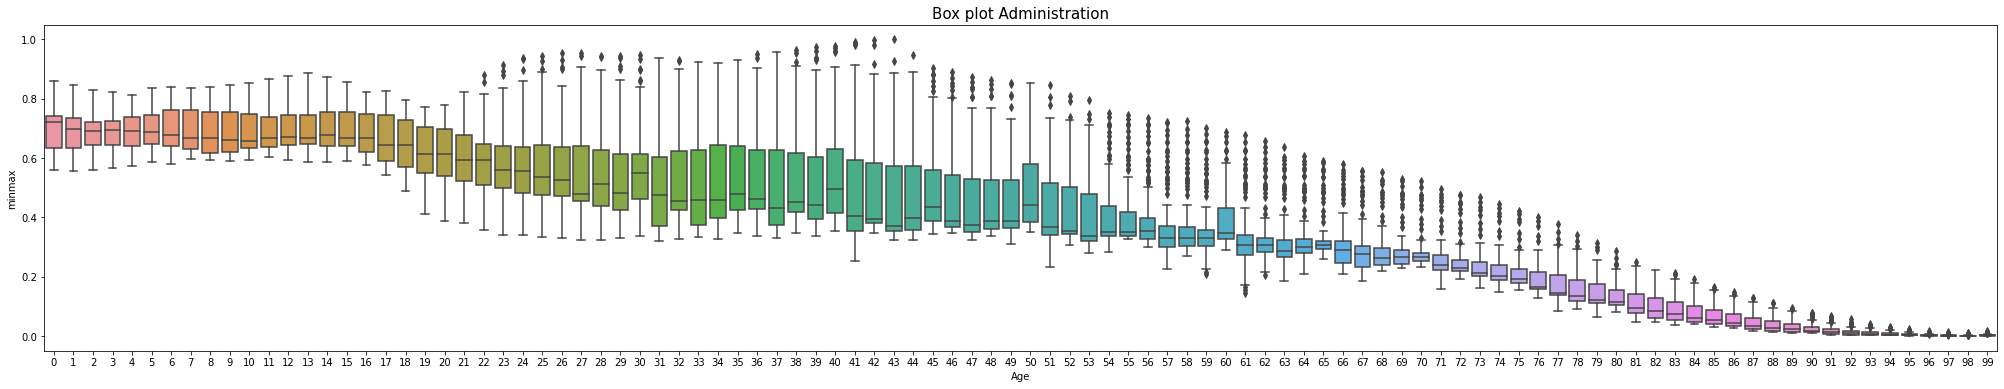

In [77]:
plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='minmax', data=df_scaled)
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

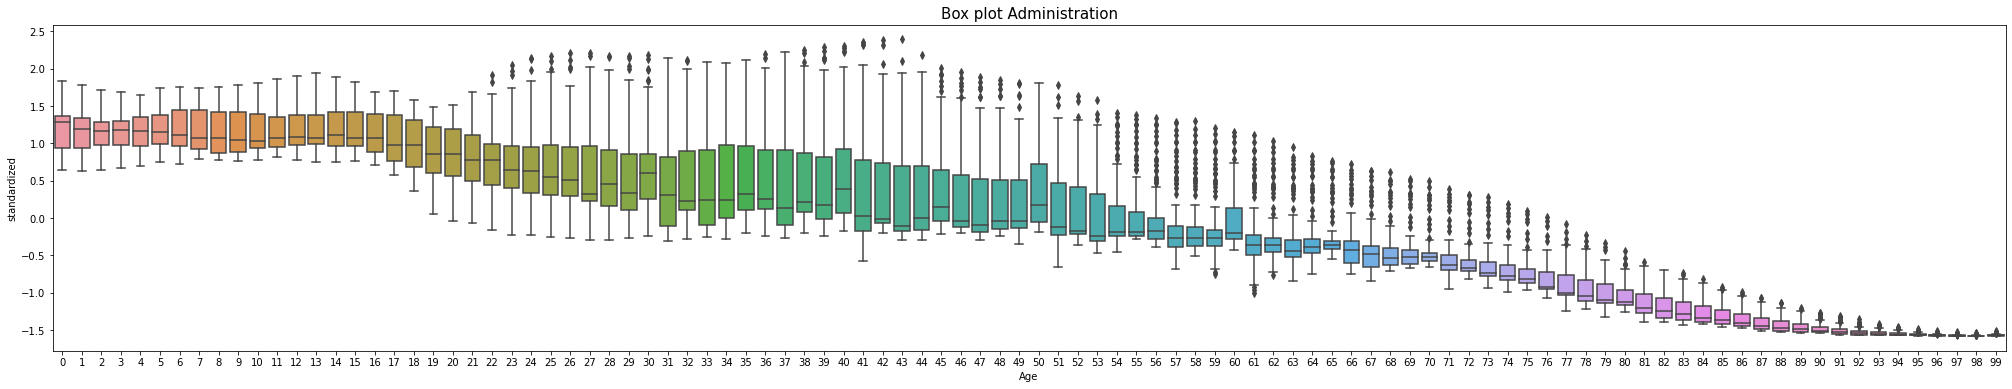

In [78]:
plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='standardized', data=df_scaled)
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

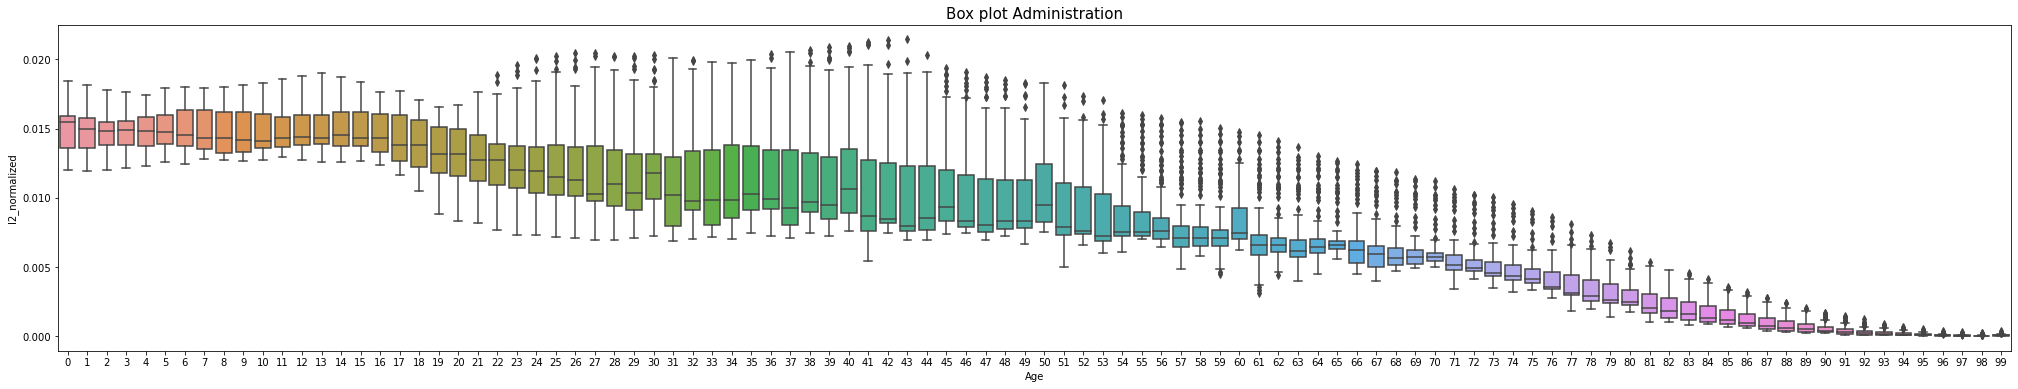

In [79]:
plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='l2_normalized', data=df_scaled)
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

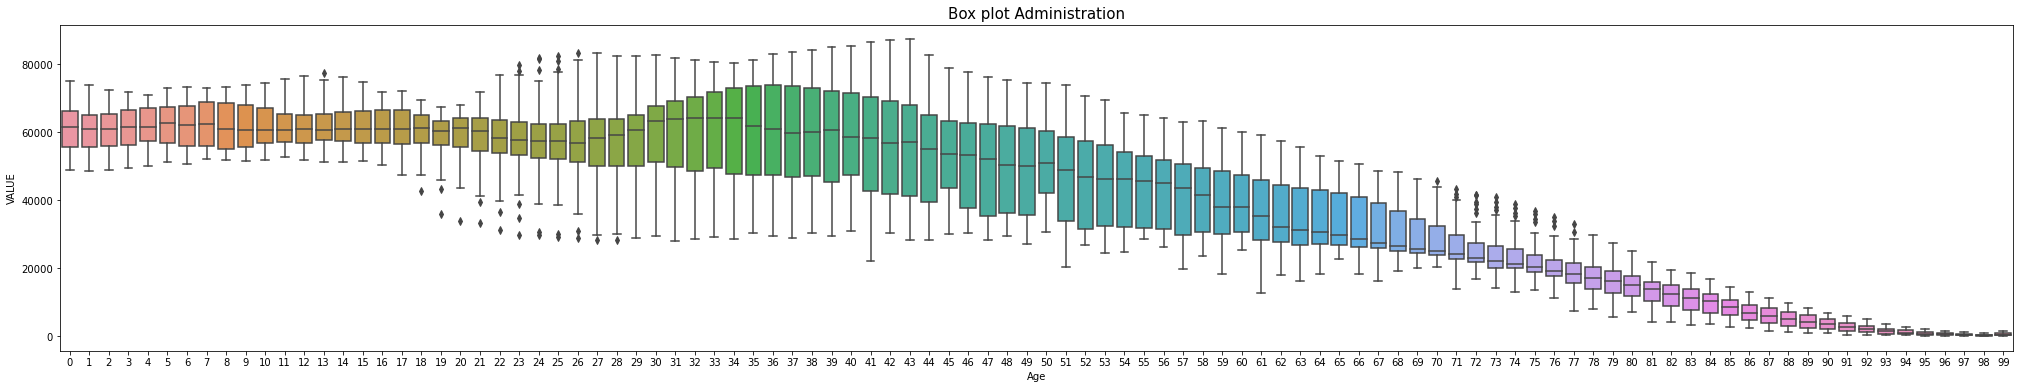

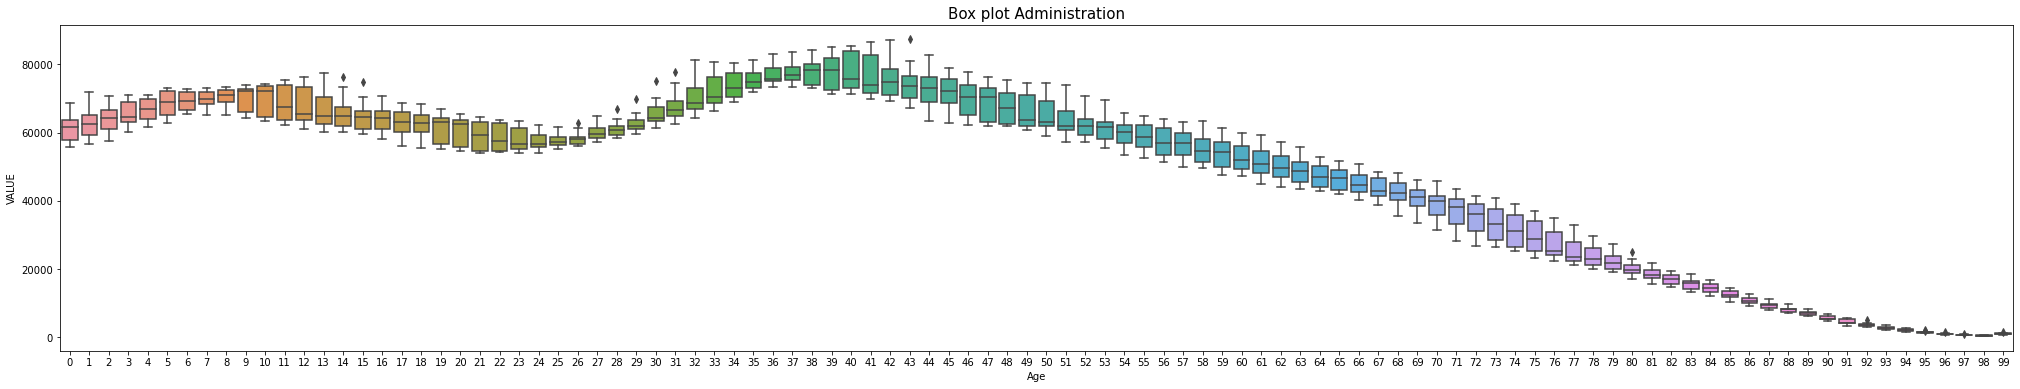

In [80]:
plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='VALUE', data=df_new)
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='VALUE', data=df_scaled[df_scaled["Year"]>=2013])
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

EDA:
- Statistics Summary
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### 2.	Machine learning models have a wide range of uses, including prediction, classification, and clustering. It is advised that you assess several approaches (at least two), choose appropriate hyperparameters for the optimal outcomes of Machine Learning models using an approach of hyperparameter tunning, such as GridSearchCV or RandomizedSearchCV. [0 - 30]

In [81]:
ml_df = df_scaled.copy()

Models to be tested:
- Regression
- XGBoost
- ARIMA
- LSTM

In [82]:
ml_df

Year  Age    VALUE    minmax  standardized  l2_normalized
0     1926    0  55391.0  0.634356      0.939497       0.013610
1     1926    1  55876.0  0.639917      0.961567       0.013729
2     1926    2  58273.0  0.667400      1.070643       0.014318
3     1926    3  59050.0  0.676309      1.106000       0.014509
4     1926    4  59123.0  0.677146      1.109322       0.014527
...    ...  ...      ...       ...           ...            ...
9795  2023   95   2128.0  0.023654     -1.484243       0.000523
9796  2023   96   1581.0  0.017382     -1.509134       0.000388
9797  2023   97   1116.0  0.012051     -1.530294       0.000274
9798  2023   98    829.0  0.008760     -1.543354       0.000204
9799  2023   99   1600.0  0.017600     -1.508270       0.000393

[9800 rows x 6 columns]

In [84]:
ml_df['Year'] = pd.to_datetime(ml_df['Year'], format="%Y")

ml_df = pd.pivot_table(
           data    = ml_df,
           values  = 'minmax',
           index   = 'Year',
           columns = 'Age'
       )

ml_df.columns.name = None
ml_df.columns = [f"age_{col}" for col in ml_df.columns]
#data = data.asfreq('1Y')
ml_df = ml_df.sort_index()

ml_df.head()

age_0     age_1     age_2     age_3     age_4     age_5  \
Year                                                                     
1926-01-01  0.634356  0.639917  0.667400  0.676309  0.677146  0.691031   
1927-01-01  0.632309  0.637187  0.662953  0.669390  0.670993  0.684186   
1928-01-01  0.630263  0.634457  0.658505  0.662470  0.664839  0.677341   
1929-01-01  0.628216  0.631727  0.654058  0.655551  0.658685  0.670496   
1930-01-01  0.626170  0.628997  0.649610  0.648631  0.652532  0.663651   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
Year                                                ...                       
1926-01-01  0.686480  0.641797  0.611734  0.628772  ...  0.014711  0.003818   
1927-01-01  0.678872  0.638788  0.612522  0.627918  ...  0.014227  0.003816   
1928-01-01  0.671264  0.635778  0.613309  0.627064  ...  0.013743  0.003814   
1929-01-01  0.663657  0.632768  0.614097  0.626210  ...  0.013259  0.003811   
1930-01-01  0.656049  0.629758  0.614885  0.625355  ...  0.012775  0.003809   

              age_92    age_93    age_94    age_95    age_96    age_97  \
Year                                                                     
1926-01-01  0.004185  0.002534  0.002431  0.002052  0.001399  0.000516   
1927-01-01  0.004117  0.002545  0.002362  0.001972  0.001370  0.000496   
1928-01-01  0.004050  0.002557  0.002293  0.001892  0.001341  0.000477   
1929-01-01  0.003982  0.002568  0.002224  0.001812  0.001313  0.000457   
1930-01-01  0.003914  0.002580  0.002156  0.001731  0.001284  0.000438   

              age_98    age_99  
Year                            
1926-01-01  0.000459  0.001296  
1927-01-01  0.000433  0.001199  
1928-01-01  0.000408  0.001103  
1929-01-01  0.000383  0.001007  
1930-01-01  0.000358  0.000910  

[5 rows x 100 columns]

In [85]:
ml_df = ml_df.resample('AS', label='left').asfreq("Y")

In [86]:
ml_df.index

DatetimeIndex(['1926-01-01', '1927-01-01', '1928-01-01', '1929-01-01',
               '1930-01-01', '1931-01-01', '1932-01-01', '1933-01-01',
               '1934-01-01', '1935-01-01', '1936-01-01', '1937-01-01',
               '1938-01-01', '1939-01-01', '1940-01-01', '1941-01-01',
               '1942-01-01', '1943-01-01', '1944-01-01', '1945-01-01',
               '1946-01-01', '1947-01-01', '1948-01-01', '1949-01-01',
               '1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
      

In [87]:
# Split data into train-validation-test
# ======================================================================================
end_train = '2017-01-01 23:59:00'

ml_df_train = ml_df.loc[:end_train, :].copy()
ml_df_test  = ml_df.loc[end_train:, :].copy()

print(f"Train dates      : {ml_df_train.index.min()} --- {ml_df_train.index.max()}  (n={len(ml_df_train)})")
print(f"Test dates       : {ml_df_test.index.min()} --- {ml_df_test.index.max()}  (n={len(ml_df_test)})")

Train dates      : 1926-01-01 00:00:00 --- 2017-01-01 00:00:00  (n=92)
Test dates       : 2018-01-01 00:00:00 --- 2023-01-01 00:00:00  (n=6)


Let's try to train a single time series using a linear regression model:

In [248]:
from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  HistGradientBoostingRegressor
from lightgbm import LGBMRegressor

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

# Train and backtest a model for each item: ForecasterAutoreg
# ======================================================================================
items = []
mae_values = []
predictions = {}

for i, item in enumerate(tqdm(data.columns)):

    # Define forecaster
    forecaster = ForecasterAutoreg(
                     regressor     = HistGradientBoostingRegressor(random_state=123),
                     lags          = 14,
                     transformer_y = StandardScaler()
                 )

    # Backtesting forecaster
    metric, preds = backtesting_forecaster(
                        forecaster         = forecaster,
                        y                  = data[item],
                        initial_train_size = len(data_train),
                        steps              = 7,
                        metric             = 'mean_absolute_error',
                        refit              = False,
                        fixed_train_size   = False,
                        verbose            = False,
                        show_progress      = False
                    )

    items.append(item)
    mae_values.append(metric)
    predictions[item] = preds

# Results
uni_series_mae = pd.Series(
                     data  = mae_values,
                     index = items,
                     name  = 'uni_series_mae'
                 )

In [249]:
# Train and backtest a model for all items: ForecasterAutoregMultiSeries
# ======================================================================================
items = list(data.columns)

# Define forecaster
forecaster_ms = ForecasterAutoregMultiSeries(
                    regressor          = HistGradientBoostingRegressor(random_state=123),
                    lags               = 14,
                    transformer_series = StandardScaler(),
                )

# Backtesting forecaster for all items
multi_series_mae, predictions_ms = backtesting_forecaster_multiseries(
                                       forecaster         = forecaster_ms,
                                       series             = data,
                                       levels             = items,
                                       steps              = 7,
                                       metric             = 'mean_absolute_error',
                                       initial_train_size = len(data_train),
                                       refit              = False,
                                       fixed_train_size   = False,
                                       verbose            = False,
                                       show_progress      = True                                   )

# Results
display(multi_series_mae.head(3))
print('')
display(predictions_ms.head(3))

  0%|          | 0/1 [00:00<?, ?it/s]

levels  mean_absolute_error
0  age_0             0.033175
1  age_1             0.022300
2  age_2             0.031867

age_0     age_1     age_2     age_3     age_4     age_5  \
2018-01-01  0.707572  0.704119  0.728164  0.747021  0.764007  0.792821   
2019-01-01  0.707651  0.682771  0.726851  0.733929  0.753101  0.771496   
2020-01-01  0.709328  0.656220  0.729545  0.726645  0.752382  0.754637   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2018-01-01  0.833940  0.833533  0.826826  0.827858  ...  0.061808  0.051141   
2019-01-01  0.836615  0.843307  0.823762  0.828511  ...  0.060817  0.052629   
2020-01-01  0.839314  0.837674  0.823800  0.834205  ...  0.064531  0.052696   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2018-01-01  0.041292  0.032384  0.024684  0.016468  0.007689  0.007885   
2019-01-01  0.041895  0.031728  0.024728  0.016132  0.006870  0.007974   
2020-01-01  0.041243  0.030215  0.023037  0.016481  0.006133  0.008026   

              age_98    age_99  
2018-01-01  0.004958  0.010052  
2019-01-01  0.005302  0.009994  
2020-01-01  0.005113  0.010263  

[3 rows x 100 columns]

In [250]:
# Difference of backtesting metric for each item
# ======================================================================================
multi_series_mae = multi_series_mae.set_index('levels')
multi_series_mae.columns = ['multi_series_mae']
results = pd.concat((uni_series_mae, multi_series_mae), axis = 1)
results['improvement'] = results.eval('uni_series_mae - multi_series_mae')
results['improvement_(%)'] = 100 * results.eval('(uni_series_mae - multi_series_mae) / uni_series_mae')
results = results.round(2)
results.style.bar(subset=['improvement_(%)'], align='mid', color=['#d65f5f', '#5fba7d'])

In [251]:
# Average improvement for all items
# ======================================================================================
results[['improvement', 'improvement_(%)']].agg(['mean', 'min', 'max'])

improvement  improvement_(%)
mean       0.0416          29.9905
min       -0.0800        -356.6100
max        0.1800          90.7800

In [252]:
# Number of series with positive and negative improvement
# ======================================================================================
pd.Series(np.where(results['improvement_(%)'] < 0, 'negative', 'positive')).value_counts()

positive    83
negative    17
dtype: int64

In [254]:
predictions_ms

age_0     age_1     age_2     age_3     age_4     age_5  \
2018-01-01  0.707572  0.704119  0.728164  0.747021  0.764007  0.792821   
2019-01-01  0.707651  0.682771  0.726851  0.733929  0.753101  0.771496   
2020-01-01  0.709328  0.656220  0.729545  0.726645  0.752382  0.754637   
2021-01-01  0.707226  0.651132  0.732993  0.730655  0.744133  0.743490   
2022-01-01  0.695068  0.646719  0.726355  0.734158  0.741935  0.737971   
2023-01-01  0.675669  0.639564  0.722789  0.724883  0.735663  0.742749   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2018-01-01  0.833940  0.833533  0.826826  0.827858  ...  0.061808  0.051141   
2019-01-01  0.836615  0.843307  0.823762  0.828511  ...  0.060817  0.052629   
2020-01-01  0.839314  0.837674  0.823800  0.834205  ...  0.064531  0.052696   
2021-01-01  0.854426  0.840588  0.824580  0.847143  ...  0.063008  0.054023   
2022-01-01  0.860201  0.840333  0.838733  0.849748  ...  0.062941  0.052573   
2023-01-01  0.875644  0.847200  0.855618  0.856699  ...  0.063018  0.052556   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2018-01-01  0.041292  0.032384  0.024684  0.016468  0.007689  0.007885   
2019-01-01  0.041895  0.031728  0.024728  0.016132  0.006870  0.007974   
2020-01-01  0.041243  0.030215  0.023037  0.016481  0.006133  0.008026   
2021-01-01  0.041569  0.030477  0.023671  0.016745  0.005547  0.007901   
2022-01-01  0.041567  0.030587  0.023261  0.016483  0.004607  0.007904   
2023-01-01  0.041041  0.030629  0.023298  0.016483  0.004238  0.007904   

              age_98    age_99  
2018-01-01  0.004958  0.010052  
2019-01-01  0.005302  0.009994  
2020-01-01  0.005113  0.010263  
2021-01-01  0.005178  0.009371  
2022-01-01  0.005089  0.009687  
2023-01-01  0.004994  0.009606  

[6 rows x 100 columns]

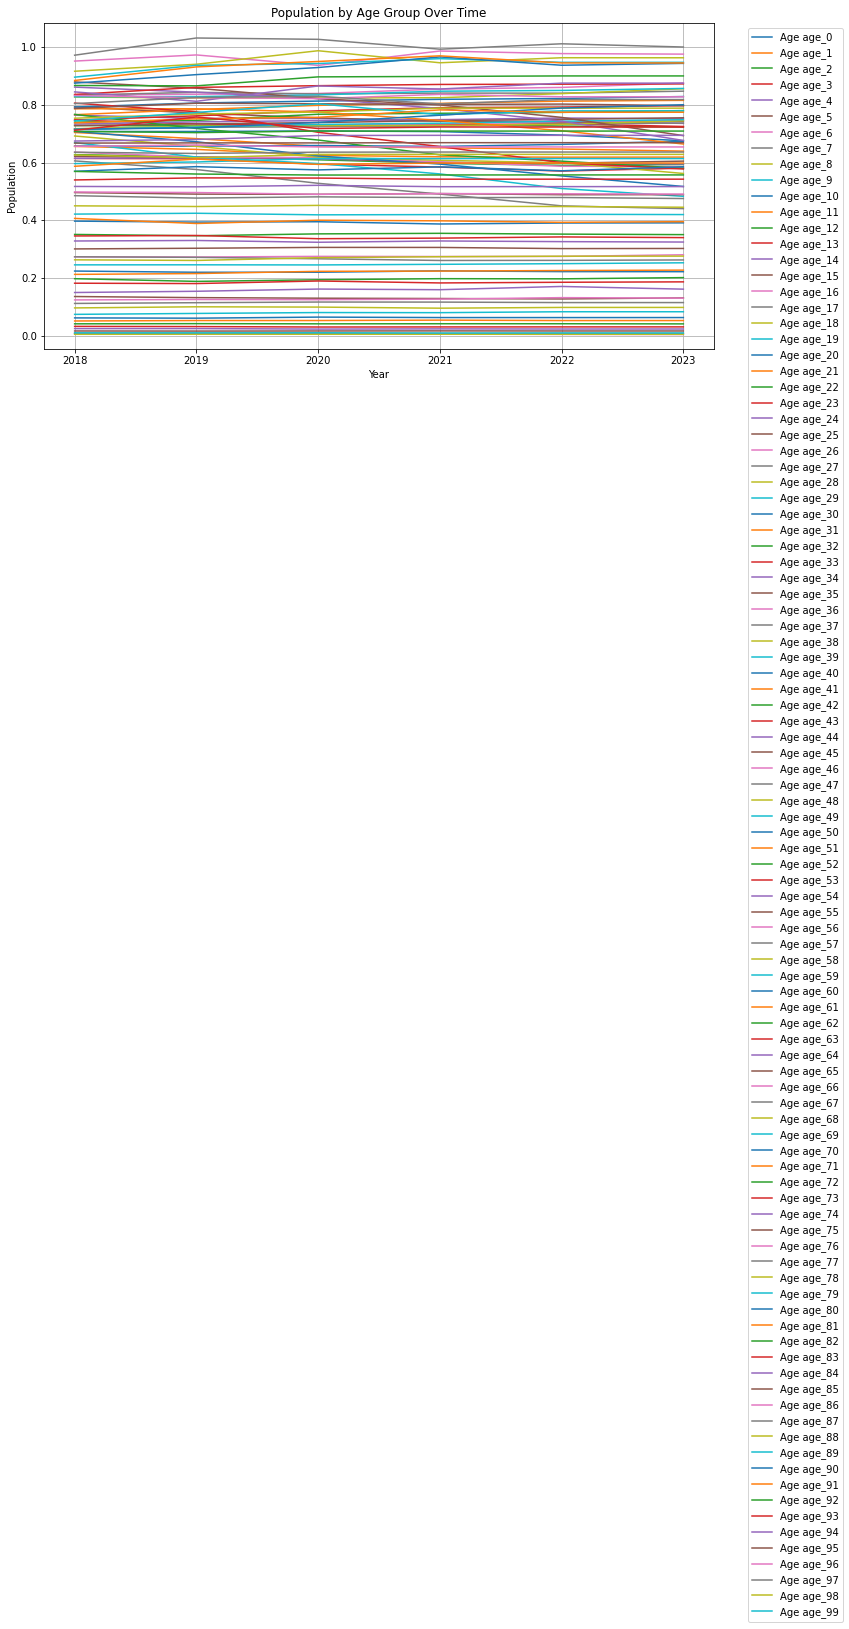

In [255]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the data as described
# df should have a DatetimeIndex and columns for each age group

# Extract the years and ages as columns
years = predictions_ms.index.year
ages = predictions_ms.columns

# Create a line plot for each age group
plt.figure(figsize=(12, 6))

for age in ages:
    plt.plot(years, predictions_ms[age], label=f'Age {age}')

# Customize the plot
plt.title('Population by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.grid(True)
plt.show()


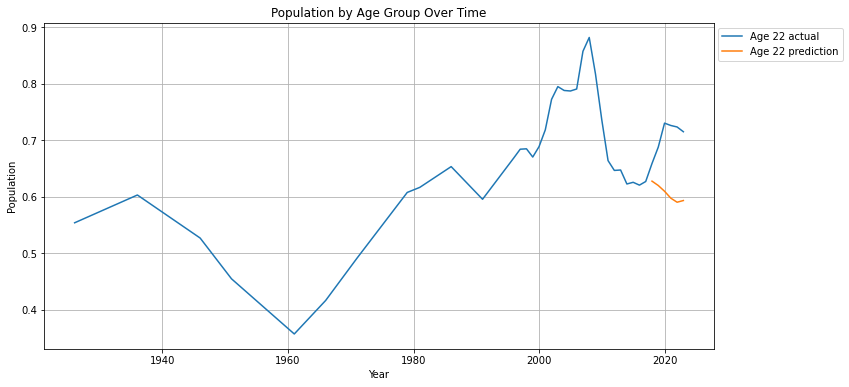

In [279]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the data as described
# df should have a DatetimeIndex and columns for each age group

age_to_predict = 22

# Create a line plot for each age group
plt.figure(figsize=(12, 6))
plt.plot(data.iloc[:, age_to_predict].index.year, data.iloc[:, age_to_predict], label=f'Age {age_to_predict} actual')
plt.plot(predictions_ms.iloc[:, age_to_predict].index.year, predictions_ms.iloc[:, age_to_predict], label=f'Age {age_to_predict} prediction')

# Customize the plot
plt.title('Population by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.grid(True)
plt.show()

# Linear Regression - Age 27

In [182]:
ml_df_27 = df_scaled.copy()

In [183]:
ml_df_27 = ml_df_27[ml_df_27["Age"]==27].reset_index()

In [184]:
ml_df_27["Time"] = np.arange(len(ml_df_27.index))

In [185]:
ml_df_27

index  Year  Age    VALUE    minmax  standardized  l2_normalized  Time
0      27  1926   27  41050.0  0.469925      0.286908       0.010086     0
1     127  1927   27  41148.6  0.471056      0.291394       0.010111     1
2     227  1928   27  41247.2  0.472186      0.295881       0.010135     2
3     327  1929   27  41345.8  0.473317      0.300368       0.010159     3
4     427  1930   27  41444.4  0.474447      0.304855       0.010183     4
..    ...   ...  ...      ...       ...           ...            ...   ...
93   9327  2019   27  58016.0  0.664454      1.058948       0.014255    93
94   9427  2020   27  58318.0  0.667916      1.072690       0.014329    94
95   9527  2021   27  58383.0  0.668662      1.075648       0.014345    95
96   9627  2022   27  59374.0  0.680024      1.120744       0.014589    96
97   9727  2023   27  61053.0  0.699275      1.197147       0.015001    97

[98 rows x 8 columns]

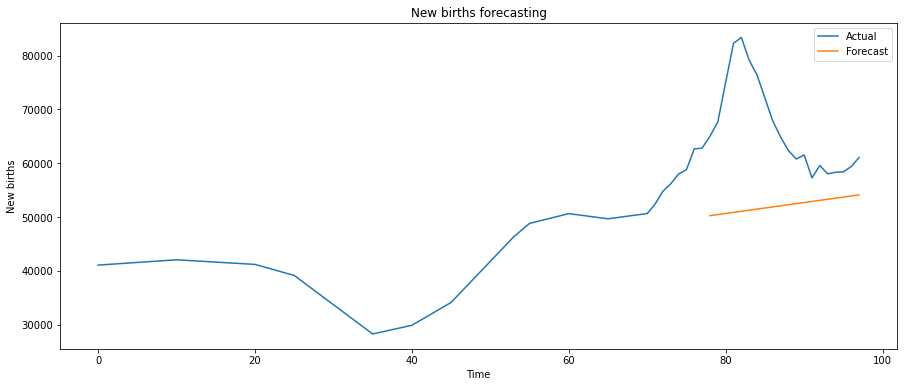

In [186]:
from sklearn.linear_model import LinearRegression

X_train = ml_df_27.loc[:77, ["Time"]]
X_test = ml_df_27.loc[77+1:, ["Time"]]

y_train = ml_df_27.loc[:77, ["VALUE"]]
y_test = ml_df_27.loc[77+1:, ["VALUE"]]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = model.predict(X_test)

plt.figure(figsize=(15, 6))
plt.plot(ml_df_27["Time"], ml_df_27["VALUE"], label="Actual")
plt.plot(X_test["Time"], y_pred, label="Forecast")

plt.xlabel('Time')
plt.ylabel('New births')
plt.title('New births forecasting')
plt.legend()
plt.show()

In [188]:
error = mean_squared_error(y_test, y_pred)
print(f"MSE error is {error}")

MSE error is 291865060.1478175


# Linear Regression - All ages

In [189]:
ml_df_lr = df_scaled.copy()

In [190]:
ml_df_lr

Year  Age    VALUE    minmax  standardized  l2_normalized
0     1926    0  55391.0  0.634356      0.939497       0.013610
1     1926    1  55876.0  0.639917      0.961567       0.013729
2     1926    2  58273.0  0.667400      1.070643       0.014318
3     1926    3  59050.0  0.676309      1.106000       0.014509
4     1926    4  59123.0  0.677146      1.109322       0.014527
...    ...  ...      ...       ...           ...            ...
9795  2023   95   2128.0  0.023654     -1.484243       0.000523
9796  2023   96   1581.0  0.017382     -1.509134       0.000388
9797  2023   97   1116.0  0.012051     -1.530294       0.000274
9798  2023   98    829.0  0.008760     -1.543354       0.000204
9799  2023   99   1600.0  0.017600     -1.508270       0.000393

[9800 rows x 6 columns]

In [191]:
ml_df_lr["Time"] = ml_df_lr["Year"].apply(lambda x: x - 1926)

In [192]:
ml_df_lr

Year  Age    VALUE    minmax  standardized  l2_normalized  Time
0     1926    0  55391.0  0.634356      0.939497       0.013610     0
1     1926    1  55876.0  0.639917      0.961567       0.013729     0
2     1926    2  58273.0  0.667400      1.070643       0.014318     0
3     1926    3  59050.0  0.676309      1.106000       0.014509     0
4     1926    4  59123.0  0.677146      1.109322       0.014527     0
...    ...  ...      ...       ...           ...            ...   ...
9795  2023   95   2128.0  0.023654     -1.484243       0.000523    97
9796  2023   96   1581.0  0.017382     -1.509134       0.000388    97
9797  2023   97   1116.0  0.012051     -1.530294       0.000274    97
9798  2023   98    829.0  0.008760     -1.543354       0.000204    97
9799  2023   99   1600.0  0.017600     -1.508270       0.000393    97

[9800 rows x 7 columns]

In [193]:
X_train = ml_df_lr.loc[:7899, ["Time", "Age"]]
X_test = ml_df_lr.loc[7899+1:, ["Time", "Age"]]

y_train = ml_df_lr.loc[:7899, ["VALUE"]]
y_test = ml_df_lr.loc[7899+1:, ["VALUE"]]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = model.predict(X_test)

In [194]:
error = mean_squared_error(y_test, y_pred)
print(f"MSE error is {error}")

MSE error is 246620411.10640374


In [213]:
df_1 = X_test.reset_index()
df_2 = y_test.reset_index()
df_3 = pd.DataFrame(y_pred, columns=["VALUE_pred"]).reset_index()

result = pd.concat([df_1, df_2, df_3], axis=1).loc[:,["Time", "Age", "VALUE", "VALUE_pred"]]

In [214]:
result

Time  Age    VALUE    VALUE_pred
0       79    0  61053.0  69625.962609
1       79    1  61348.0  68959.962654
2       79    2  59939.0  68293.962698
3       79    3  56638.0  67627.962743
4       79    4  57552.0  66961.962787
...    ...  ...      ...           ...
1895    97   95   2128.0   8549.041423
1896    97   96   1581.0   7883.041467
1897    97   97   1116.0   7217.041511
1898    97   98    829.0   6551.041556
1899    97   99   1600.0   5885.041600

[1900 rows x 4 columns]

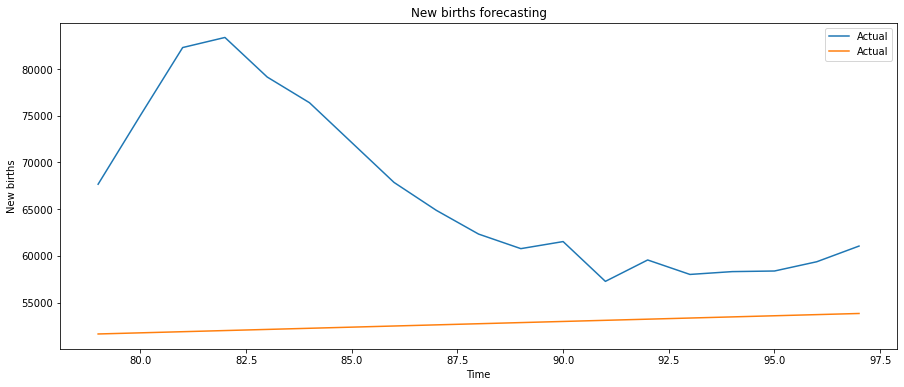

In [217]:
plt.figure(figsize=(15, 6))
plt.plot(result[result["Age"]==27]["Time"], result[result["Age"]==27]["VALUE"], label="Actual")
plt.plot(result[result["Age"]==27]["Time"], result[result["Age"]==27]["VALUE_pred"], label="Actual")
#plt.plot(X_test["Time"], y_pred, label="Forecast")

plt.xlabel('Time')
plt.ylabel('New births')
plt.title('New births forecasting')
plt.legend()
plt.show()

# Arima - Age 27

In [242]:
arima_df_27 = df_scaled.copy()
arima_df_27 = arima_df_27[arima_df_27["Age"]==27].reset_index()
arima_df_27['Year'] = pd.to_datetime(arima_df_27['Year'], format="%Y")

arima_df_27 = arima_df_27.loc[:, ["Year", "minmax"]]

In [243]:
arima_df_27

Year    minmax
0  1926-01-01  0.469925
1  1927-01-01  0.471056
2  1928-01-01  0.472186
3  1929-01-01  0.473317
4  1930-01-01  0.474447
..        ...       ...
93 2019-01-01  0.664454
94 2020-01-01  0.667916
95 2021-01-01  0.668662
96 2022-01-01  0.680024
97 2023-01-01  0.699275

[98 rows x 2 columns]

                               SARIMAX Results                                
Dep. Variable:                 minmax   No. Observations:                   98
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 267.726
Date:                Sat, 04 Nov 2023   AIC                           -523.452
Time:                        13:53:25   BIC                           -508.004
Sample:                             0   HQIC                          -517.205
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5725      0.049     11.725      0.000       0.477       0.668
ar.L2          0.2474      0.070      3.524      0.000       0.110       0.385
ar.L3         -0.2399      0.082     -2.935      0.0

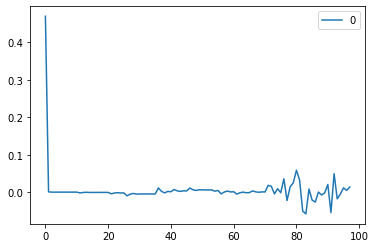

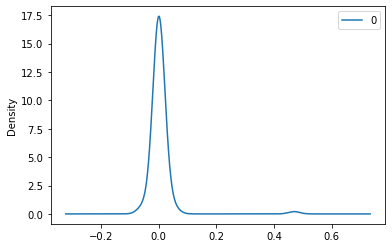

               0
count  98.000000
mean    0.005772
std     0.049758
min    -0.057752
25%    -0.001876
50%     0.000407
75%     0.004900
max     0.469925


In [244]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(arima_df_27.minmax, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

predicted=0.570751, expected=0.570838
predicted=0.568558, expected=0.568623
predicted=0.566557, expected=0.570875
predicted=0.573117, expected=0.573126
predicted=0.575626, expected=0.575378
predicted=0.577639, expected=0.577630
predicted=0.579877, expected=0.579882
predicted=0.581977, expected=0.599936
predicted=0.619281, expected=0.627396
predicted=0.656247, expected=0.643380
predicted=0.656266, expected=0.664247
predicted=0.687239, expected=0.673500
predicted=0.679522, expected=0.717678
predicted=0.743207, expected=0.719295
predicted=0.747051, expected=0.744783
predicted=0.747203, expected=0.775167
predicted=0.800198, expected=0.859601
predicted=0.899652, expected=0.942877
predicted=1.042789, expected=0.955249
predicted=0.948422, expected=0.906691
predicted=0.877640, expected=0.875172
predicted=0.905588, expected=0.826247
predicted=0.788947, expected=0.777369
predicted=0.722995, expected=0.743132
predicted=0.731089, expected=0.713986
predicted=0.693877, expected=0.696111
predicted=0.

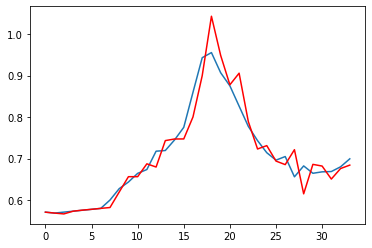

In [246]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = arima_df_27.minmax.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# VAR - All ages

In [685]:
ml_df_aarima = df_scaled.copy()

In [686]:
selected_ages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]
ml_df_aarima = ml_df_aarima[ml_df_aarima["Age"].isin(selected_ages)]

In [687]:
ml_df_aarima['Year'] = pd.to_datetime(ml_df_aarima['Year'], format="%Y")

ml_df_aarima = pd.pivot_table(
           data    = ml_df_aarima,
           values  = 'l2_normalized',
           index   = 'Year',
           columns = 'Age'
       )

ml_df_aarima.columns.name = None
ml_df_aarima.columns = [f"age_{col}" for col in ml_df_aarima.columns]
#data = data.asfreq('1Y')
ml_df_aarima = ml_df_aarima.sort_index()

ml_df_aarima.head()

age_0    age_10    age_20    age_30    age_40    age_50  \
Year                                                                     
1926-01-01  0.013610  0.014081  0.013272  0.013177  0.013930  0.014743   
1927-01-01  0.013566  0.014038  0.013179  0.012949  0.013629  0.014288   
1928-01-01  0.013522  0.013995  0.013085  0.012722  0.013327  0.013832   
1929-01-01  0.013479  0.013952  0.012992  0.012494  0.013025  0.013377   
1930-01-01  0.013435  0.013908  0.012898  0.012267  0.012723  0.012921   

              age_60    age_70    age_80    age_90    age_99  
Year                                                          
1926-01-01  0.009776  0.005959  0.002464  0.000331  0.000044  
1927-01-01  0.009685  0.005885  0.002413  0.000321  0.000042  
1928-01-01  0.009595  0.005810  0.002363  0.000310  0.000040  
1929-01-01  0.009504  0.005736  0.002313  0.000300  0.000038  
1930-01-01  0.009414  0.005662  0.002263  0.000290  0.000035

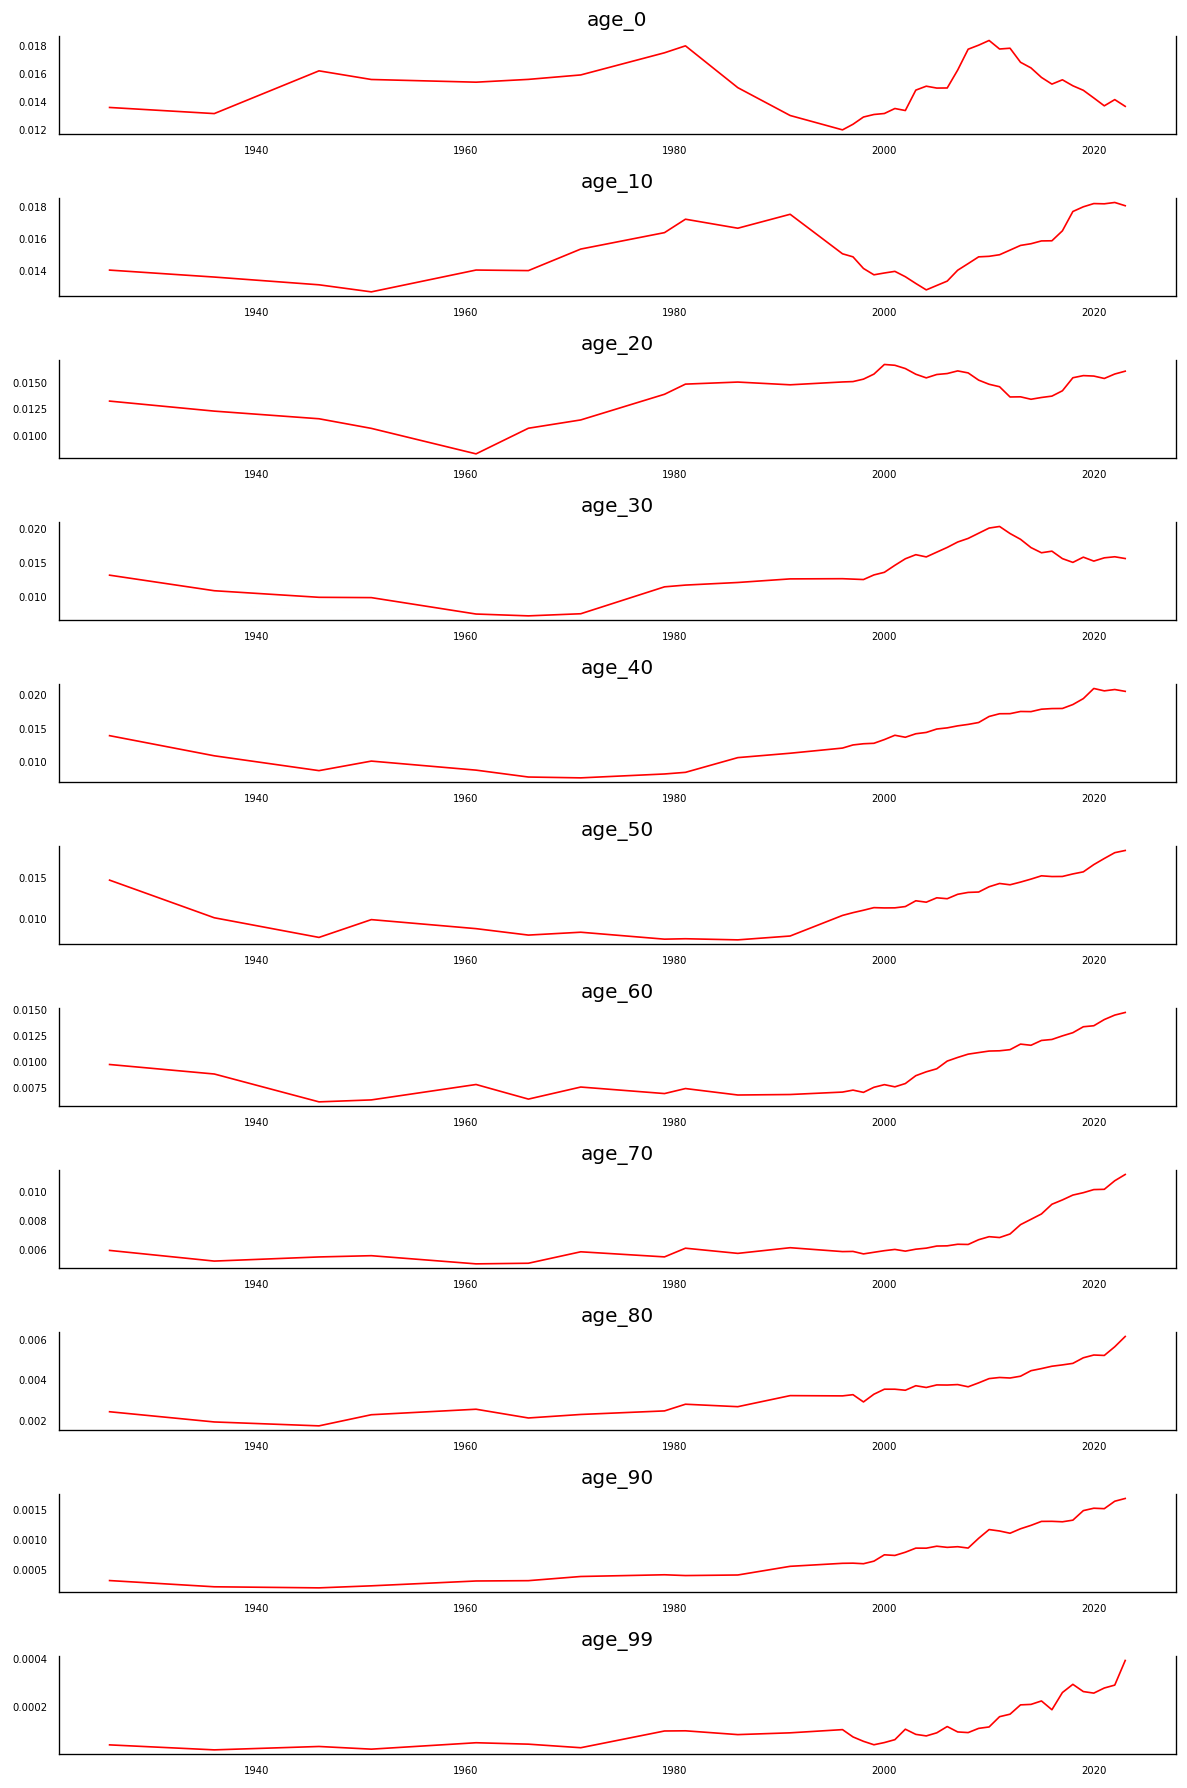

In [688]:
# Plot
fig, axes = plt.subplots(nrows=11, ncols=1, dpi=120, figsize=(10,15))
for i, ax in enumerate(axes.flatten()):
    data = ml_df_aarima[ml_df_aarima.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(ml_df_aarima.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Granger’s Causality

In [689]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12

test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(ml_df_aarima, variables = ml_df_aarima.columns)  

age_0_x  age_10_x  age_20_x  age_30_x  age_40_x  age_50_x  age_60_x  \
age_0_y    1.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
age_10_y   0.0000    1.0000    0.0000    0.0000    0.0000    0.0001    0.0017   
age_20_y   0.0000    0.0000    1.0000    0.0000    0.0003    0.0000    0.0001   
age_30_y   0.0000    0.0000    0.0000    1.0000    0.0000    0.0002    0.0000   
age_40_y   0.0000    0.0006    0.0000    0.0000    1.0000    0.0000    0.0000   
age_50_y   0.0000    0.0000    0.0000    0.0000    0.0000    1.0000    0.0000   
age_60_y   0.0043    0.0000    0.0001    0.0044    0.0000    0.0000    1.0000   
age_70_y   0.0000    0.0519    0.0000    0.0000    0.0000    0.0010    0.0000   
age_80_y   0.0003    0.0218    0.0049    0.0006    0.0009    0.0001    0.0001   
age_90_y   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0001   
age_99_y   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   

          age_70_x  age_80_x  age_90_x  age_99_x  
age_0_y     0.0001    0.0000       0.0       0.0  
age_10_y    0.0000    0.0191       0.0       0.0  
age_20_y    0.0000    0.0000       0.0       0.0  
age_30_y    0.0000    0.0000       0.0       0.0  
age_40_y    0.0000    0.0000       0.0       0.0  
age_50_y    0.0000    0.0000       0.0       0.0  
age_60_y    0.0002    0.0000       0.0       0.0  
age_70_y    1.0000    0.0030       0.0       0.0  
age_80_y    0.0000    1.0000       0.0       0.0  
age_90_y    0.0000    0.0000       1.0       0.0  
age_99_y    0.0000    0.0000       0.0       1.0

Cointegration Test

In [690]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(ml_df_aarima)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
age_0  ::  1200.37   > 263.2603  =>   True
age_10 ::  970.63    > 219.4051  =>   True
age_20 ::  769.27    > 179.5199  =>   True
age_30 ::  578.58    > 143.6691  =>   True
age_40 ::  420.6     > 111.7797  =>   True
age_50 ::  307.38    > 83.9383   =>   True
age_60 ::  226.57    > 60.0627   =>   True
age_70 ::  151.7     > 40.1749   =>   True
age_80 ::  85.98     > 24.2761   =>   True
age_90 ::  34.98     > 12.3212   =>   True
age_99 ::  2.16      > 4.1296    =>   False


In [691]:
end_train = '2017-01-01 23:59:00'

#ml_df_aarima_train = ml_df_aarima.loc[:end_train, :].copy()
#ml_df_aarima_test  = ml_df_aarima.loc[end_train:, :].copy()

nobs = 5
ml_df_aarima_train, ml_df_aarima_test = ml_df_aarima[0:-nobs], ml_df_aarima[-nobs:]

# Check size
print(ml_df_aarima_train.shape)
print(ml_df_aarima_test.shape)

(93, 11)
(5, 11)


Non stationary data

In [692]:
model = VAR(ml_df_aarima_train)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -201.5982362092448
BIC :  -197.98001781608747
FPE :  2.8453715767225935e-88
HQIC:  -200.13789260844266 

Lag Order = 2
AIC :  -205.8938581831228
BIC :  -198.91311691775178
FPE :  4.314402313654328e-90
HQIC:  -203.07756386522087 

Lag Order = 3
AIC :  -212.85913932840685
BIC :  -202.4710413650344
FPE :  5.553297150299534e-93
HQIC:  -208.67004760508547 

Lag Order = 4
AIC :  -216.59744300984016
BIC :  -202.7561508411052
FPE :  2.643521823895429e-94
HQIC:  -211.01841534396203 

Lag Order = 5
AIC :  -223.32521698463225
BIC :  -205.9838592832848
FPE :  1.3070900197097526e-96
HQIC:  -216.33881926407972 

Lag Order = 6


LinAlgError: 11-th leading minor of the array is not positive definite

In [697]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Nov, 2023
Time:                     18:57:43
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -197.980
Nobs:                     92.0000    HQIC:                  -200.138
Log likelihood:           7969.55    FPE:                2.84537e-88
AIC:                     -201.598    Det(Omega_mle):     7.38649e-89
--------------------------------------------------------------------
Results for equation age_0
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.007002         0.001171            5.978           0.000
L1.age_0          0.763519         0.051767           14.749           0.000
L1.age_10        -0.321443         0.052298           -6.146           0.000

In [698]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = ml_df_aarima_train.values[-lag_order:]
forecast_input

1


array([[0.01516506, 0.0177121 , 0.01544714, 0.01504663, 0.01859642,
        0.0154948 , 0.01280304, 0.00981617, 0.00483707, 0.00133692,
        0.00029436]])

In [699]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=ml_df_aarima.index[-nobs:], columns=ml_df_aarima_train.columns + '_forecast')
df_forecast

age_0_forecast  age_10_forecast  age_20_forecast  age_30_forecast  \
Year                                                                            
2019-01-01        0.014197         0.018686         0.016706         0.014481   
2020-01-01        0.013033         0.019789         0.018256         0.014089   
2021-01-01        0.011677         0.020991         0.020116         0.013847   
2022-01-01        0.010133         0.022270         0.022302         0.013759   
2023-01-01        0.008405         0.023605         0.024823         0.013844   

            age_40_forecast  age_50_forecast  age_60_forecast  \
Year                                                            
2019-01-01         0.018936         0.015402         0.013010   
2020-01-01         0.019342         0.015221         0.013160   
2021-01-01         0.019818         0.014972         0.013251   
2022-01-01         0.020375         0.014670         0.013280   
2023-01-01         0.021027         0.014330         0.013247   

            age_70_forecast  age_80_forecast  age_90_forecast  age_99_forecast  
Year                                                                            
2019-01-01         0.010428         0.004960         0.001366         0.000301  
2020-01-01         0.011033         0.005082         0.001396         0.000315  
2021-01-01         0.011650         0.005205         0.001428         0.000333  
2022-01-01         0.012283         0.005332         0.001460         0.000352  
2023-01-01         0.012934         0.005466         0.001492         0.000373

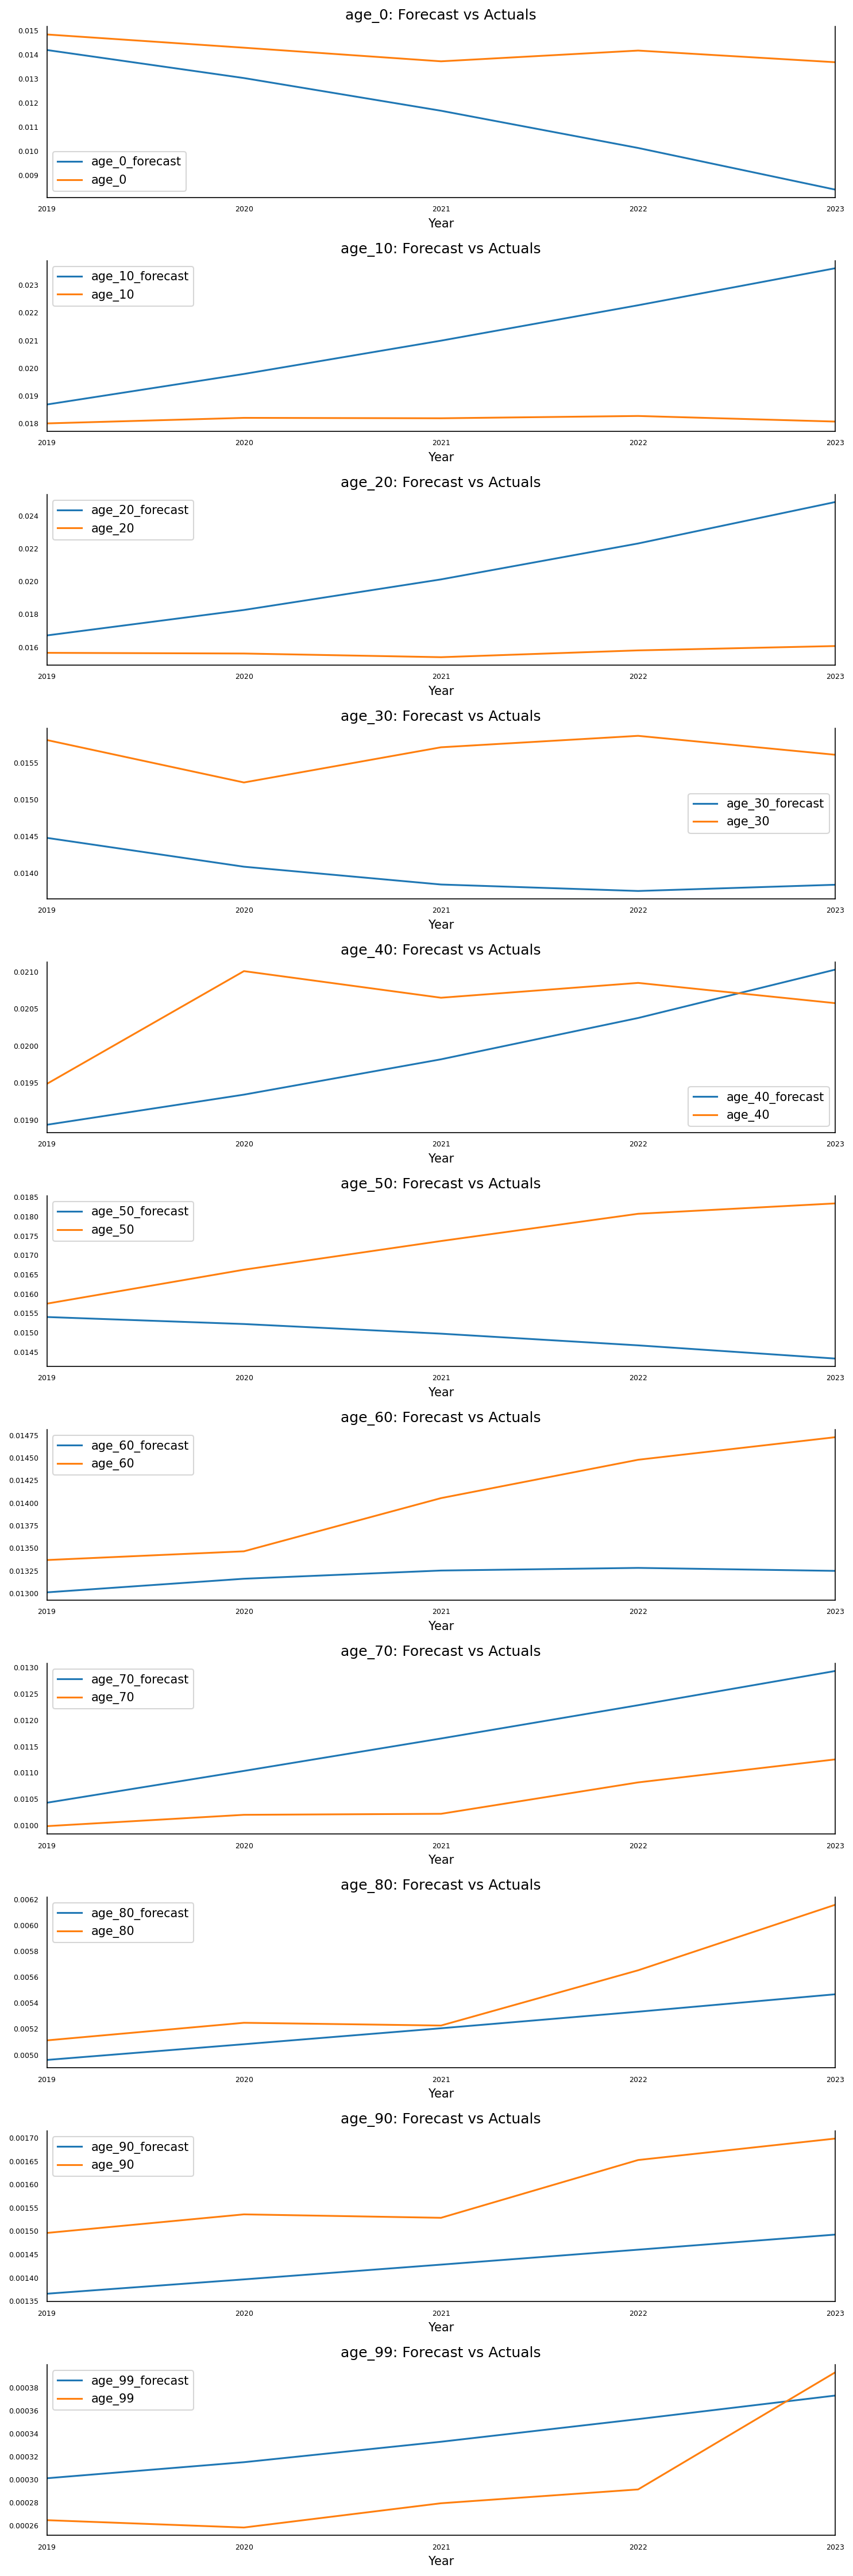

In [700]:
fig, axes = plt.subplots(nrows=len(ml_df_aarima.columns), ncols=1, dpi=150, figsize=(10,30))
for i, (col,ax) in enumerate(zip(ml_df_aarima.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    ml_df_aarima_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Convertion to stationary data

In [701]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [702]:
# ADF Test on each column
for name, column in ml_df_aarima_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "age_0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7995
 No. Lags Chosen       = 9
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0029. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "age_10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9527
 No. Lags Chosen       = 10
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.3077. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "age_20" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationa

In [703]:
# 1st difference
ml_df_aarima_train_differenced = ml_df_aarima_train.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in ml_df_aarima_train_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "age_0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.518
 No. Lags Chosen       = 11
 Critical value 1%     = -3.515
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.0075. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "age_10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.62
 No. Lags Chosen       = 12
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.4727. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "age_20" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [704]:
# 2nd difference
ml_df_aarima_train_differenced = ml_df_aarima_train_differenced.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in ml_df_aarima_train_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "age_0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7655
 No. Lags Chosen       = 7
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "age_10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1367
 No. Lags Chosen       = 11
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.23. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "age_20" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [705]:
# 3rd difference
ml_df_aarima_train_differenced = ml_df_aarima_train_differenced.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in ml_df_aarima_train_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "age_0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.6141
 No. Lags Chosen       = 9
 Critical value 1%     = -3.515
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "age_10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3472
 No. Lags Chosen       = 11
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "age_20" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

In [706]:
#ml_df_aarima_train_differenced = ml_df_aarima_train_differenced.astype('float64')

model = VAR(ml_df_aarima_train_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -198.10699424157124
BIC :  -194.41598299657525
FPE :  9.35660731973499e-87
HQIC:  -196.61925353067042 

Lag Order = 2
AIC :  -205.8034116451622
BIC :  -198.68106830353736
FPE :  4.786593406976103e-90
HQIC:  -202.93399829564956 

Lag Order = 3
AIC :  -208.00690050525415
BIC :  -197.40632997218734
FPE :  7.471731456236643e-91
HQIC:  -203.7383776362367 

Lag Order = 4
AIC :  -211.71998544816014
BIC :  -197.59321903367774
FPE :  3.991204327324877e-92
HQIC:  -206.0346164433905 

Lag Order = 5
AIC :  -219.62920207070522
BIC :  -201.92716472955186
FPE :  7.52603829846407e-95
HQIC:  -212.5089475273382 

Lag Order = 6
AIC :  -299.2948883175377
BIC :  -277.96736473721006
FPE :  6.77416396009243e-128
HQIC:  -290.7214033597728 

Lag Order = 7


LinAlgError: 5-th leading minor of the array is not positive definite

In [713]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Nov, 2023
Time:                     18:58:38
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -194.416
Nobs:                     89.0000    HQIC:                  -196.619
Log likelihood:           7558.62    FPE:                9.35661e-87
AIC:                     -198.107    Det(Omega_mle):     2.32741e-87
--------------------------------------------------------------------
Results for equation age_0
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000007         0.000044            0.153           0.879
L1.age_0         -0.670931         0.126720           -5.295           0.000
L1.age_10         0.476541         0.226580            2.103           0.035

In [714]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = ml_df_aarima_train_differenced.values[-lag_order:]
forecast_input

1


array([[-1.52783327e-03, -2.92396525e-05,  3.48910139e-04,
         1.86298357e-03,  6.50643695e-04,  1.99026206e-04,
        -2.83305204e-04,  4.10337980e-04,  6.01992845e-05,
         4.34909116e-05, -1.44969705e-04]])

In [715]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=ml_df_aarima.index[-nobs:], columns=ml_df_aarima_train_differenced.columns + '_3d')
df_forecast

age_0_3d  age_10_3d  age_20_3d  age_30_3d  age_40_3d  age_50_3d  \
Year                                                                          
2019-01-01  0.002613  -0.000444  -0.000473  -0.001297  -0.000817  -0.000426   
2020-01-01 -0.003227   0.000639   0.000080   0.000611  -0.000216   0.000044   
2021-01-01  0.003671  -0.000501   0.000412  -0.000075   0.001310   0.000696   
2022-01-01 -0.003557   0.000148  -0.000525  -0.000321  -0.001630  -0.001266   
2023-01-01  0.002805   0.000317   0.000377   0.000439   0.001230   0.001365   

            age_60_3d  age_70_3d  age_80_3d  age_90_3d  age_99_3d  
Year                                                               
2019-01-01  -0.000352  -0.000559  -0.000526  -0.000270   0.000103  
2020-01-01   0.000802   0.000504   0.000676   0.000321  -0.000035  
2021-01-01  -0.000533  -0.000188  -0.000397  -0.000189  -0.000030  
2022-01-01  -0.000048  -0.000146  -0.000020   0.000005   0.000059  
2023-01-01   0.000321   0.000280   0.000271   0.000102  -0.000045

In [716]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 3nd Diff
        df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]-df_train[col].iloc[-3]) + df_fc[str(col)+'_3d'].cumsum()
        # Roll back 2nd Diff
        df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [717]:
df_results = invert_transformation(ml_df_aarima_train_differenced, df_forecast)
df_results.loc[:, ['age_0_forecast', 'age_10_forecast', 'age_20_forecast', 'age_30_forecast',
                   'age_40_forecast', 'age_50_forecast', 'age_60_forecast', 'age_70_forecast',
                   'age_80_forecast', 'age_90_forecast', 'age_99_forecast']]

age_0_forecast  age_10_forecast  age_20_forecast  age_30_forecast  \
Year                                                                            
2019-01-01       -0.003622        -0.001845         0.000192         0.008384   
2020-01-01       -0.008924        -0.004034         0.000014         0.017861   
2021-01-01       -0.013763        -0.007096         0.000228         0.030220   
2022-01-01       -0.021694        -0.010884         0.000309         0.045140   
2023-01-01       -0.029914        -0.015081         0.000634         0.063058   

            age_40_forecast  age_50_forecast  age_60_forecast  \
Year                                                            
2019-01-01         0.001406        -0.000474        -0.001489   
2020-01-01         0.002245        -0.001392        -0.002205   
2021-01-01         0.004476        -0.001859        -0.002965   
2022-01-01         0.006471        -0.003141        -0.003817   
2023-01-01         0.009459        -0.003873        -0.004439   

            age_70_forecast  age_80_forecast  age_90_forecast  age_99_forecast  
Year                                                                            
2019-01-01         0.001725        -0.000400        -0.000177        -0.000586  
2020-01-01         0.003771        -0.000765        -0.000285        -0.001199  
2021-01-01         0.006360        -0.001434        -0.000469        -0.002015  
2022-01-01         0.009348        -0.002425        -0.000725        -0.002974  
2023-01-01         0.013014        -0.003468        -0.000950        -0.004121

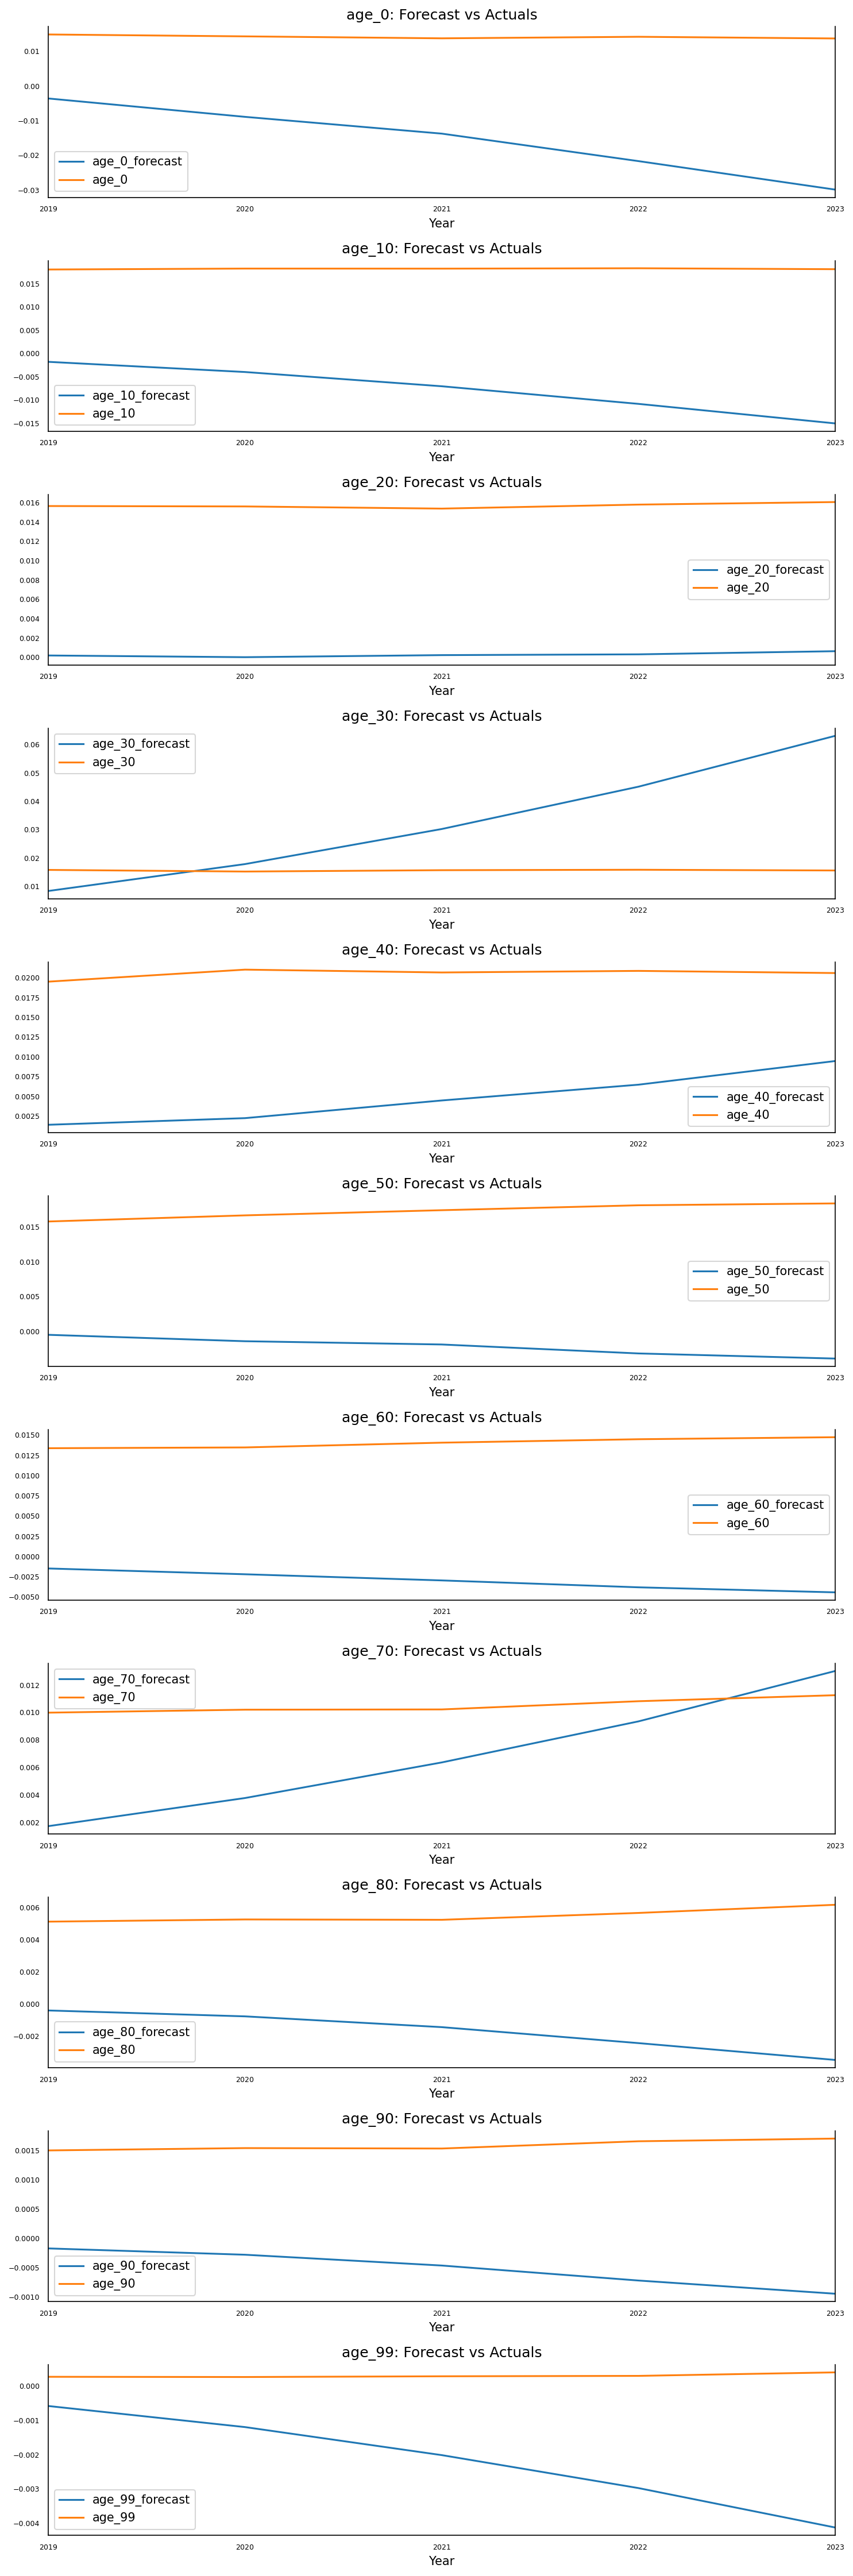

In [718]:
fig, axes = plt.subplots(nrows=len(ml_df_aarima.columns), ncols=1, dpi=150, figsize=(10,30))
for i, (col,ax) in enumerate(zip(ml_df_aarima.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    ml_df_aarima_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [725]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

for col in ml_df_aarima.columns:
    print(f'Forecast Accuracy of: {col}')
    accuracy_prod = forecast_accuracy(df_results[str(col)+"_forecast"].values, ml_df_aarima_test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))
        
    print("\n")



Forecast Accuracy of: age_0
mape :  2.1174
me :  -0.0297
mae :  0.0297
mpe :  -2.1174
rmse :  0.0311
corr :  0.7589
minmax :  2.1174


Forecast Accuracy of: age_10
mape :  1.4289
me :  -0.0259
mae :  0.0259
mpe :  -1.4289
rmse :  0.0264
corr :  -0.1882
minmax :  1.4289


Forecast Accuracy of: age_20
mape :  0.9826
me :  -0.0154
mae :  0.0154
mpe :  -0.9826
rmse :  0.0154
corr :  0.7725
minmax :  0.9826


Forecast Accuracy of: age_30
mape :  1.2899
me :  0.0173
mae :  0.0203
mpe :  1.102
rmse :  0.026
corr :  0.166
minmax :  0.4996


Forecast Accuracy of: age_40
mape :  0.7668
me :  -0.0157
mae :  0.0157
mpe :  -0.7668
rmse :  0.0159
corr :  0.3873
minmax :  0.7668


Forecast Accuracy of: age_50
mape :  1.1212
me :  -0.0194
mae :  0.0194
mpe :  -1.1212
rmse :  0.0195
corr :  -0.9753
minmax :  1.1212


Forecast Accuracy of: age_60
mape :  1.2103
me :  -0.017
mae :  0.017
mpe :  -1.2103
rmse :  0.0171
corr :  -0.9859
minmax :  1.2103


Forecast Accuracy of: age_70
mape :  0.4254
me :  -0.

### XGBoost

In [726]:
ml_df_xgb = df_scaled.copy()

ml_df_xgb['Year'] = pd.to_datetime(ml_df_xgb['Year'], format="%Y")

ml_df_xgb = pd.pivot_table(
           data    = ml_df_xgb,
           values  = 'VALUE',
           index   = 'Year',
           columns = 'Age'
       )

ml_df_xgb.columns.name = None
ml_df_xgb.columns = [f"age_{col}" for col in ml_df_xgb.columns]
#data = data.asfreq('1Y')
ml_df_xgb = ml_df_xgb.sort_index()

ml_df_xgb.head()

age_0    age_1    age_2    age_3    age_4    age_5    age_6  \
Year                                                                        
1926-01-01  55391.0  55876.0  58273.0  59050.0  59123.0  60334.0  59937.0   
1927-01-01  55212.5  55637.9  57885.1  58446.5  58586.3  59737.0  59273.5   
1928-01-01  55034.0  55399.8  57497.2  57843.0  58049.6  59140.0  58610.0   
1929-01-01  54855.5  55161.7  57109.3  57239.5  57512.9  58543.0  57946.5   
1930-01-01  54677.0  54923.6  56721.4  56636.0  56976.2  57946.0  57283.0   

              age_7    age_8    age_9  ...  age_90  age_91  age_92  age_93  \
Year                                   ...                                   
1926-01-01  56040.0  53418.0  54904.0  ...  1348.0   398.0   430.0   286.0   
1927-01-01  55777.5  53486.7  54829.5  ...  1305.8   397.8   424.1   287.0   
1928-01-01  55515.0  53555.4  54755.0  ...  1263.6   397.6   418.2   288.0   
1929-01-01  55252.5  53624.1  54680.5  ...  1221.4   397.4   412.3   289.0   
1930-01-01  54990.0  53692.8  54606.0  ...  1179.2   397.2   406.4   290.0   

            age_94  age_95  age_96  age_97  age_98  age_99  
Year                                                        
1926-01-01   277.0   244.0   187.0   110.0   105.0   178.0  
1927-01-01   271.0   237.0   184.5   108.3   102.8   169.6  
1928-01-01   265.0   230.0   182.0   106.6   100.6   161.2  
1929-01-01   259.0   223.0   179.5   104.9    98.4   152.8  
1930-01-01   253.0   216.0   177.0   103.2    96.2   144.4  

[5 rows x 100 columns]

In [727]:
nobs = 5
ml_df_xgb_train, ml_df_xgb_test = ml_df_xgb[0:-nobs], ml_df_xgb[-nobs:]

# Check size
print(ml_df_xgb_train.shape)
print(ml_df_xgb_test.shape)

(93, 100)
(5, 100)


In [728]:
def create_time_feature(df):
    df['year'] = df.index.dt.year
    return df

In [729]:
ml_df_xgb_train = create_time_feature(ml_df_xgb_train)
ml_df_xgb_test = create_time_feature(ml_df_xgb_test)

ml_df_xgb_train.head()

AttributeError: 'DatetimeIndex' object has no attribute 'dt'